In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import geopy
from geopy import Point
from geopy.distance import geodesic
import re
import geojson
import urllib
import geopandas as gpd

import plotly.graph_objects as go
import requests
import plotly.express as px

isu = Point(42.026789, -93.646802)
downtown_ames = [42.024858, -93.612847]


pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [3]:
data = pd.read_csv('./../../communal/Ames_Housing_Price_Data_cleaned_3.csv')
data.filter(regex = 'Porch')

,TotalPorchSF
0,166
1,105
2,105
3,128
4,279
5,45
6,177
7,144
8,24
9,0


### Read in Data

In [4]:
data = pd.read_csv('../../communal/Ames_Housing_Price_Data_cleaned_2.csv')

In [5]:
ames_geo_data['features'][0]

NameError: name 'ames_geo_data' is not defined

### Helper functions

In [6]:
#Calculate distance between certain points
def distance(row, other_location):
    neighborhoodLocation = Point(row['lat'],row['long'])
    return round(geodesic(neighborhoodLocation,other_location).miles,2)


#Loading the geodata for the outline of Ames
url = 'https://polygons.openstreetmap.fr/get_geojson.py?id=128947&params=0'
#request = requests.get(url)
# ames_geo_data = gpd.read_file(request.text)
ames_geo_data = gpd.read_file('./../data/geo/ames.json')

#function for plotting geo data
def plot_ames(column, s ,save = False):
    plt.rcParams['figure.figsize'] = 20,20
    ax = ames_geo_data.plot(color = 'white', edgecolor = 'black', alpha = .7)
    ames = sns.scatterplot(axes = ax, x = data['long'],\
                y = data['lat'], hue = column, size = s)
    if save :
        plt.savefig('ames.png',transparent = True)
    ames

def elbow_test(f): 
    inertia = []
    K = range(1,15)
    X = data[f]
    print(X.head())
    for k in K:
        km = KMeans(n_clusters=k)
        km = km.fit(X)
        inertia.append(km.inertia_)

        print(inertia)


    plt.plot(K, inertia, marker= "x")
    plt.xlabel('k')
    plt.xticks(np.arange(15))
    plt.ylabel('Intertia')
    plt.title('Elbow Method')
    plt.show()

In [7]:
for neighborhood in data.Neighborhood.unique():
    plot_ames(data[data['Neighborhood'] == neighborhood]['SalePrice'],1,save = True)
    plt.savefig(f'{neighborhood}.pdf')
    plt.clf()
    
# data.groupby('Neighborhood').size().sort_values()

/Users/charlesphillips/opt/anaconda3/lib/python3.8/site-packages/geopandas/plotting.py:661: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax = plt.subplots(figsize=figsize)


<Figure size 1440x1440 with 0 Axes>

<Figure size 1440x1440 with 0 Axes>

<Figure size 1440x1440 with 0 Axes>

<Figure size 1440x1440 with 0 Axes>

<Figure size 1440x1440 with 0 Axes>

<Figure size 1440x1440 with 0 Axes>

<Figure size 1440x1440 with 0 Axes>

<Figure size 1440x1440 with 0 Axes>

<Figure size 1440x1440 with 0 Axes>

<Figure size 1440x1440 with 0 Axes>

<Figure size 1440x1440 with 0 Axes>

<Figure size 1440x1440 with 0 Axes>

<Figure size 1440x1440 with 0 Axes>

<Figure size 1440x1440 with 0 Axes>

<Figure size 1440x1440 with 0 Axes>

<Figure size 1440x1440 with 0 Axes>

<Figure size 1440x1440 with 0 Axes>

<Figure size 1440x1440 with 0 Axes>

<Figure size 1440x1440 with 0 Axes>

<Figure size 1440x1440 with 0 Axes>

<Figure size 1440x1440 with 0 Axes>

<Figure size 1440x1440 with 0 Axes>

<Figure size 1440x1440 with 0 Axes>

<Figure size 1440x1440 with 0 Axes>

<Figure size 1440x1440 with 0 Axes>

<Figure size 1440x1440 with 0 Axes>

<Figure size 1440x1440 with 0 Axes>

<Figure size 1440x1440 with 0 Axes>

In [8]:
# data.groupby('Neighborhood').size().sort_values()
# neigh_data = pd.DataFrame(columns = '')


data.groupby('Neighborhood')['SalePrice'].agg(['mean','std','size']).sort_values(by = 'mean')

,mean,std,size
Neighborhood,,,
MeadowV,96682.631579,19904.135885,38
BrDale,106491.666667,12046.562561,30
IDOTRR,107840.300000,35139.906583,80
BrkSide,126116.105769,35780.568253,104
OldTown,126886.686636,45180.207699,217
Edwards,132972.609467,47964.462570,169
SWISU,133575.809524,29980.848960,42
Landmrk,137000.000000,NaN,1
Sawyer,137446.865248,22780.631455,141


# Add some addtional data

In [9]:
#  Distance to college, an price per square foot
data['distFromCollege'] = data.apply(lambda row : distance(row,isu) , axis = 1 )
data['PPSF'] = data['SalePrice']/(data['1stFlrSF'] + data['2ndFlrSF'])

#Creating Data_time objects out of the given time data
data['MoSold'] = data['MoSold'].astype('str').apply(lambda n : '0' + n if len(n) == 1 else n)
data['date'] = pd.to_datetime(data['YrSold'].astype(str)  + data['MoSold'].astype(str), format='%Y%m')


# Distance From College
### Explore the relationships between housing data and proximity to ISU

<AxesSubplot:xlabel='Neighborhood', ylabel='SalePrice'>

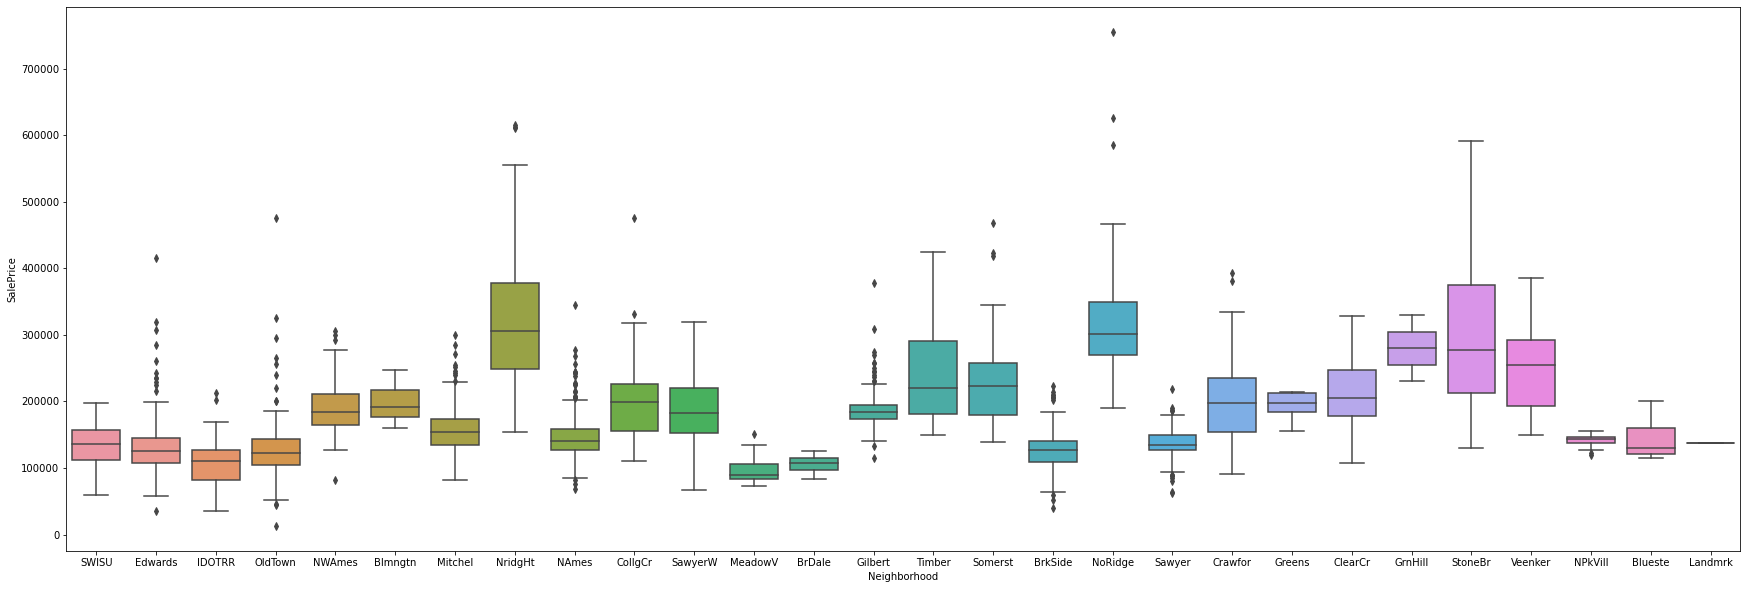

In [10]:
plt.rcParams["figure.figsize"] = (30,10)
sns.boxplot(x = 'Neighborhood', y = 'SalePrice', data = data)


# Inspecting Price per Square Footage

In [11]:
data['PricePerSF'] = data.SalePrice/ data.GrLivArea

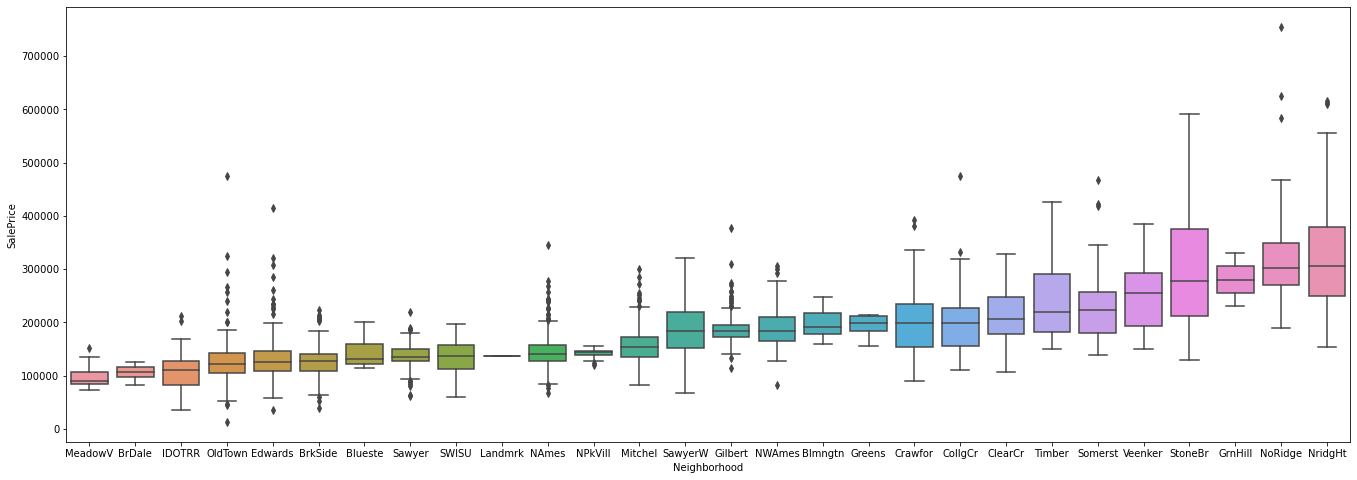

In [12]:
plt.rcParams['figure.figsize'] = 23,8
my_order = data.groupby('Neighborhood').SalePrice.median().sort_values().index
my_order
sns.boxplot(x = 'Neighborhood'  , y = 'SalePrice', data = data, order = my_order)
plt.savefig('neighborhood_sale_price_box_plot.png')

Which of the house styles, ranch or colonial, is more popular in terms of the house prices?

# Non-Normality of the Predicted Variable, SalePrice
The sale Price is not very normal. The log is certainly more normal, but we sacrifice clarity of the model for normality

Text(0.5, 0, 'log SalePrice')

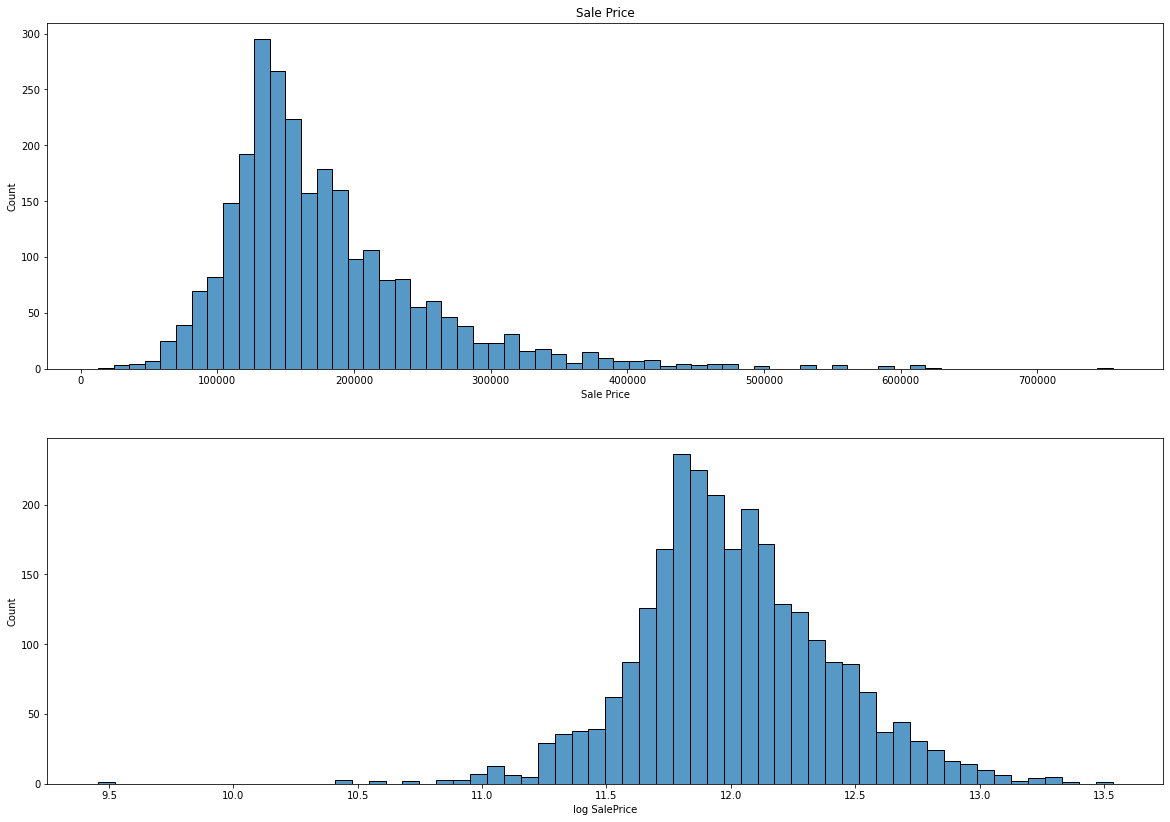

In [9]:
#Here we see that the distribution of the sale prices is skewed right
_ , axes = plt.subplots(2, figsize=(20, 14))

sns.histplot( x = data['SalePrice'], ax = axes[0])
axes[0].set_title('Sale Price')
axes[0].set_xlabel('Sale Price')
sns.histplot(x = np.log(data['SalePrice']),ax = axes[1])
axes[1].set_xlabel('log SalePrice')


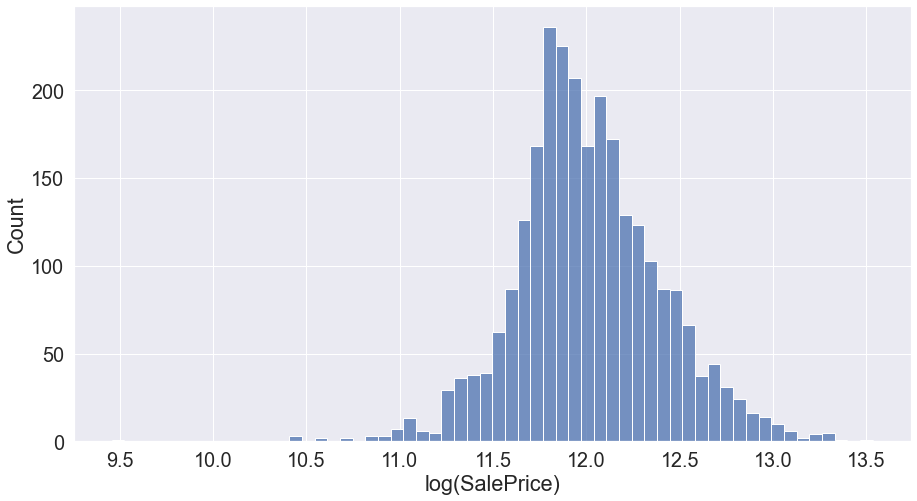

In [20]:
sns.set(font_scale = 1.8)
plt.rcParams['figure.figsize'] = 15,8

sns.histplot(x = np.log(data['SalePrice'])).set_xlabel('log(SalePrice)')

plt.savefig('logsalepricehist.png', dpi = 500)

# Normality of Price Per Square Feet

<AxesSubplot:xlabel='PPSF', ylabel='Count'>

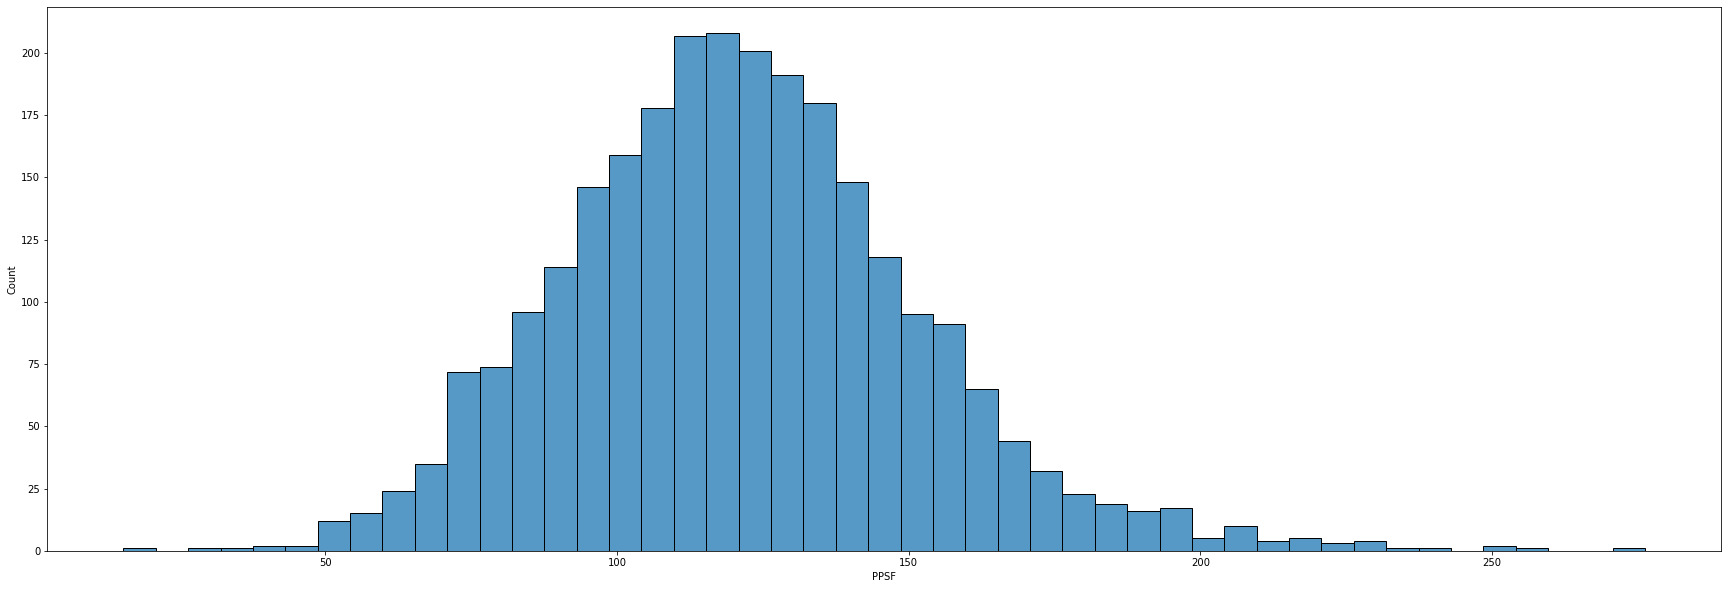

In [11]:
#The price per square footage (where square footage is the sum of the first and second floor)
# seems pretty normal
sns.histplot(x = data['PPSF'])

# Plotting every feature against price per square footage

In [143]:
# for c in data.columns:
#     sns.scatterplot(x = data[c], y = data['PPSF'])
#     plt.savefig(f'ppsf_vs_everything/ppsf_vs_{c}.pdf')
#     plt.clf()

# What features of a garage result in a higher price for the house?

#### Features vs SalePrice

# Plotting lat long data to try and see trends

In [101]:
# y , x = data['lat'], data['long']

In [7]:
ax = ames_geo_data.plot(color = 'white', edgecolor = 'red')



ames = sns.scatterplot(axes = ax, x = data['long'],\
                y = data['lat'], hue = data['SalePrice'], size = data.SalePrice)

ames

NameError: name 'ames_geo_data' is not defined

In [144]:
# for c in data.columns:
#     plot = plot_ames(c)
#     plt.savefig(f'ames_plots/ames_plot_of_{c}.pdf')
#     plt.clf()
#     print(c, end = '\r')

<AxesSubplot:xlabel='long', ylabel='SalePrice'>

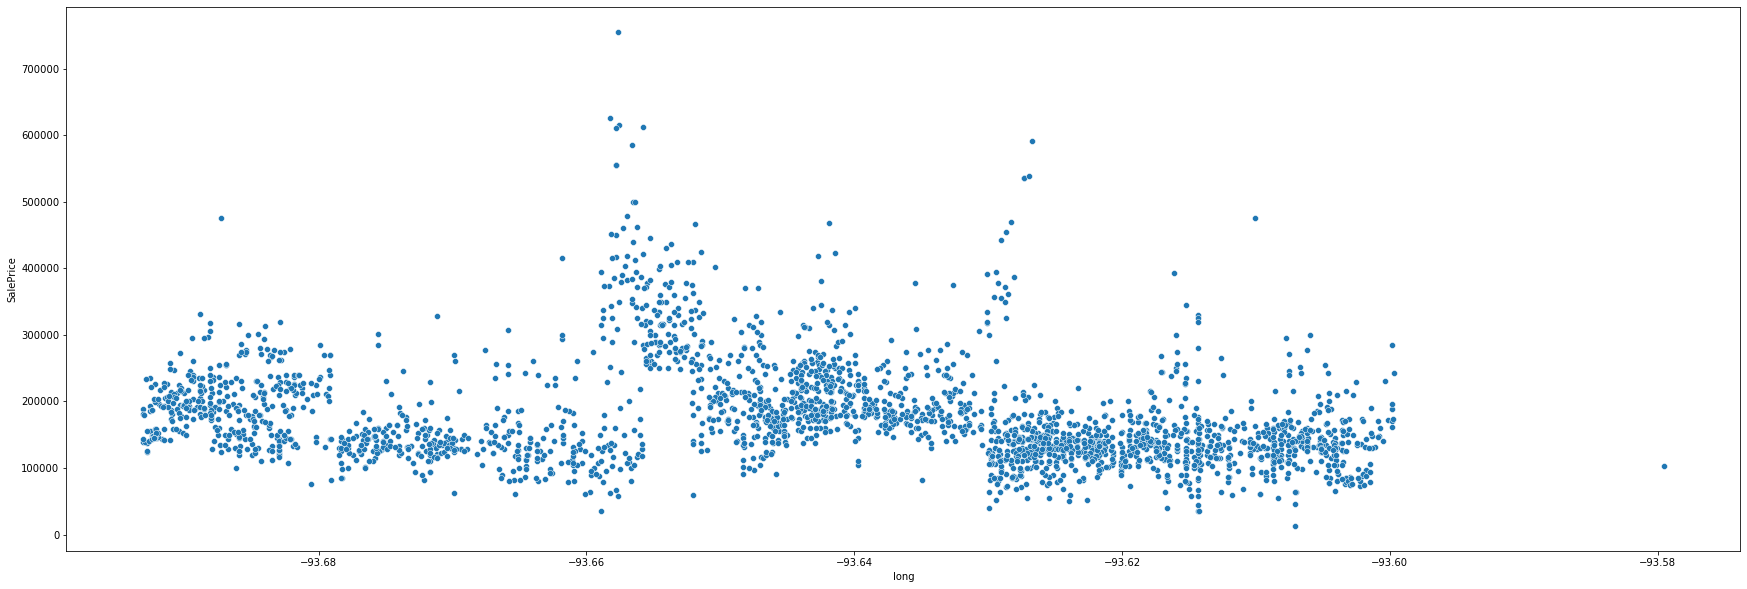

In [19]:
# Here we look at price based on longitudinal data
sns.scatterplot(data = data, x = 'long', y = 'SalePrice')

<AxesSubplot:xlabel='lat', ylabel='SalePrice'>

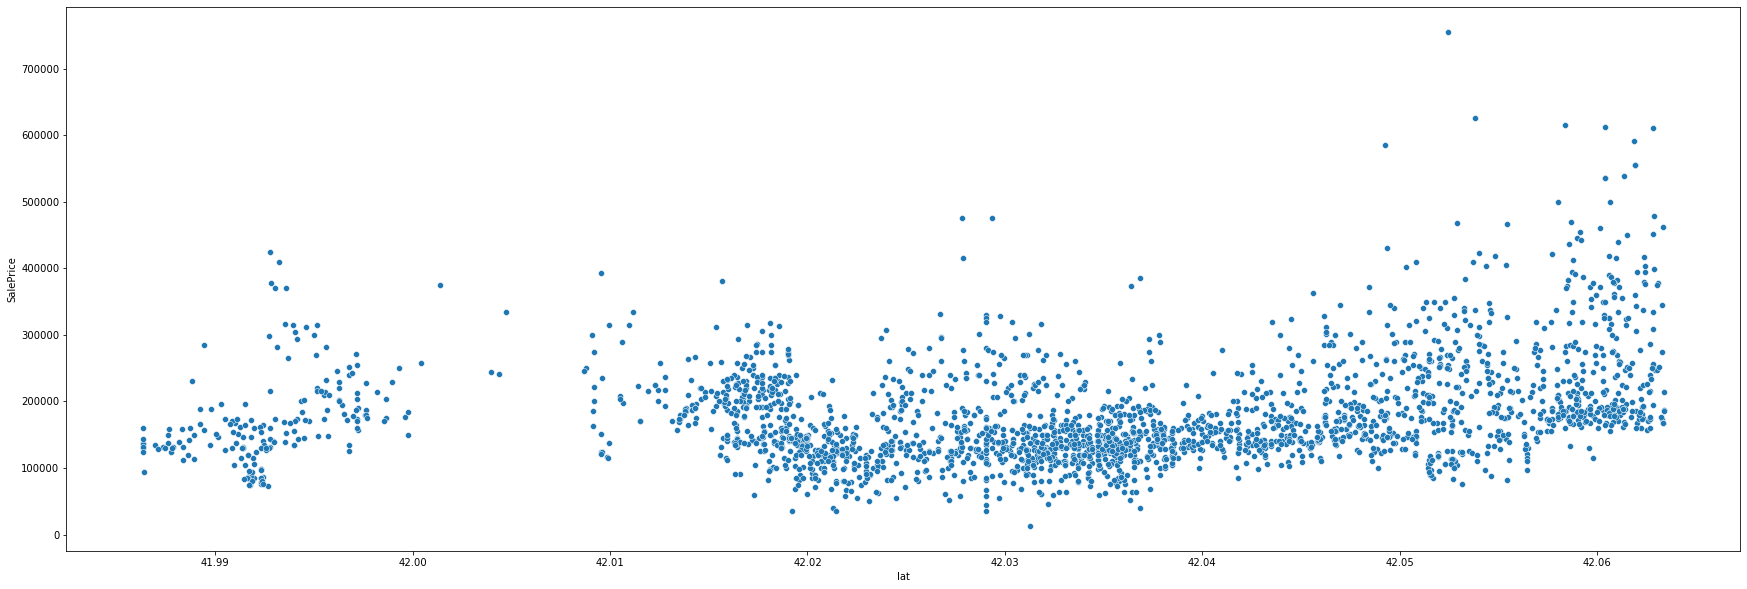

In [20]:
#here we look at price based on longitude data
sns.scatterplot(data= data, x = 'lat', y = 'SalePrice')

# Time Series Analysis

<AxesSubplot:xlabel='date', ylabel='SalePrice'>

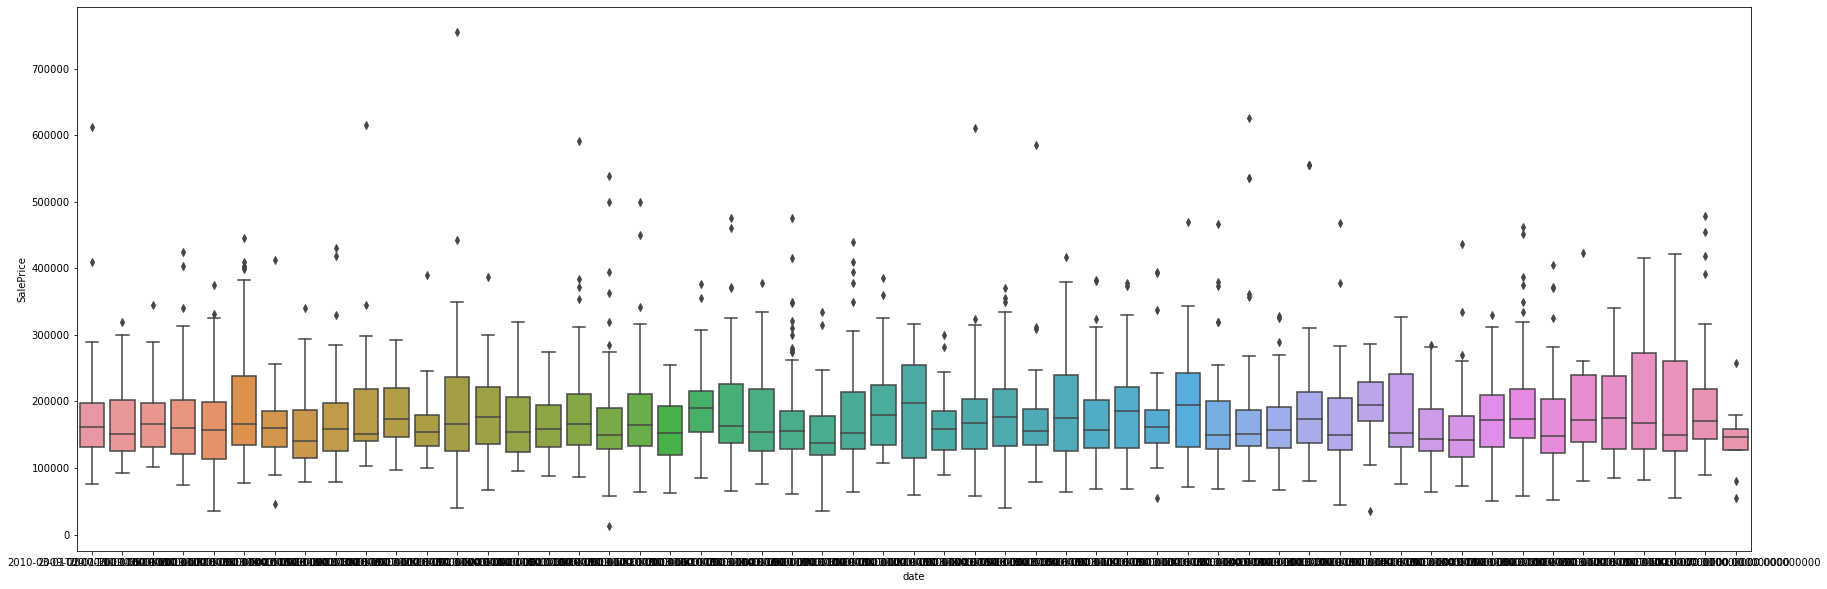

In [593]:
sns.boxplot(data = data, x = 'date', y = 'SalePrice')

# Distance from Artery

<AxesSubplot:xlabel='distFromArtery', ylabel='PPSF'>

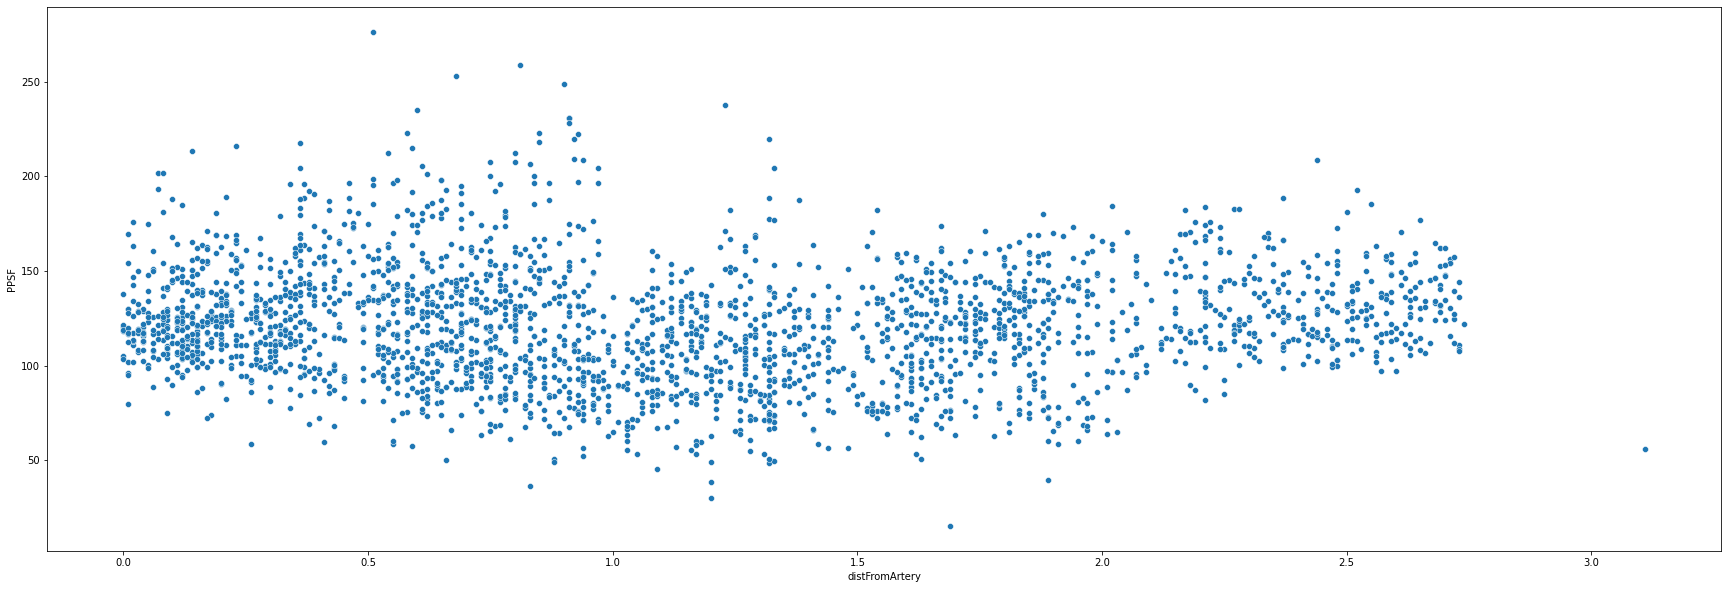

In [318]:
data['distFromArtery'] = data.apply(lambda r : distance(r, Point(r['lat'], -93.640)), axis = 1)
# data.distFromArtery.sort_values(ascending = True)
sns.scatterplot(data = data, x = 'distFromArtery', y = 'PPSF')

## Distance from ISU

# Correlation

<AxesSubplot:>

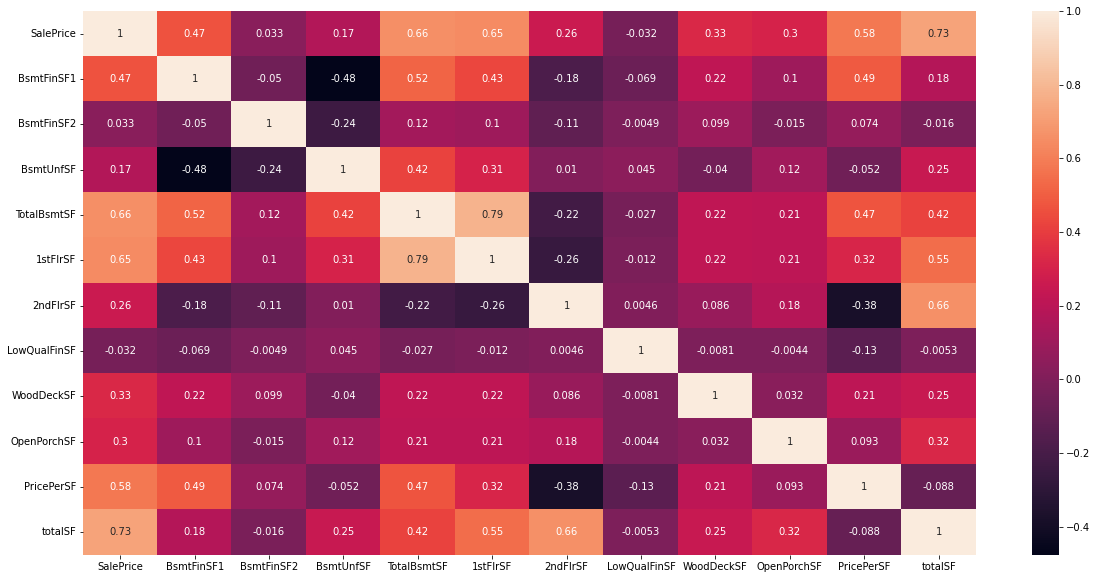

In [108]:
sns.heatmap(sf.corr(), annot = True)

<AxesSubplot:>

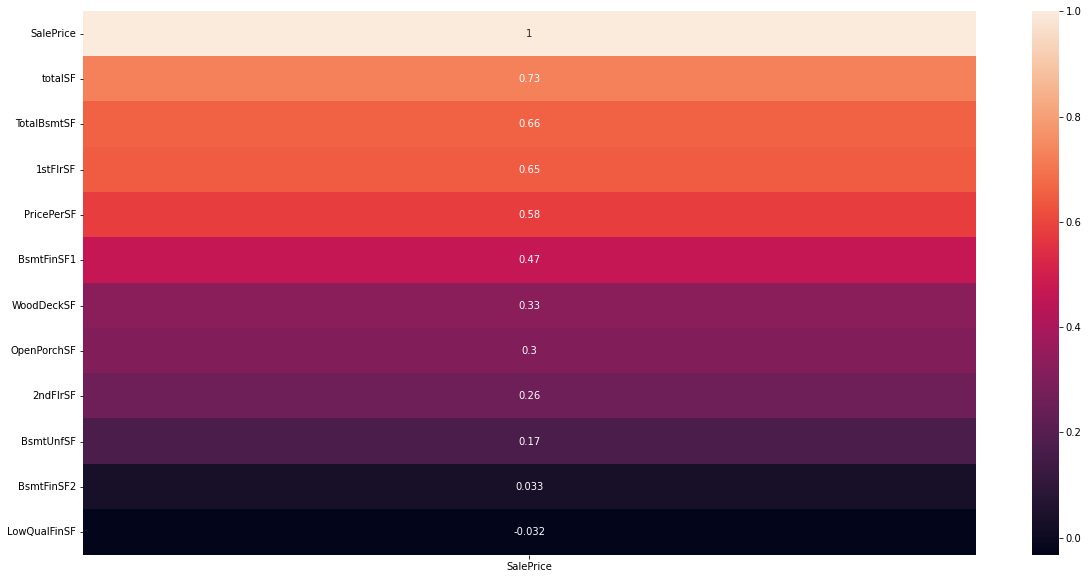

In [121]:
sns.heatmap(sf.corr()[['SalePrice']].sort_values(by = 'SalePrice', ascending = False), annot = True)

In [165]:
from sklearn.linear_model import Lasso

In [215]:
alphas = np.linspace(.001,200,num = 20)
coefs = []
for alpha in alphas:
    lasso.set_params(alpha = alpha, normalize = True)
    lasso.fit(data[continuous], data[['SalePrice']])
    lasso.score(data[continuous], data[['SalePrice']])
    coefs.append(lasso.coef_)

/usr/local/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 973736810002.5233, tolerance: 1506141295.56257
  model = cd_fast.enet_coordinate_descent(


Text(0.5, 1.0, 'Change of Lasso Slopes Varying Alpha')

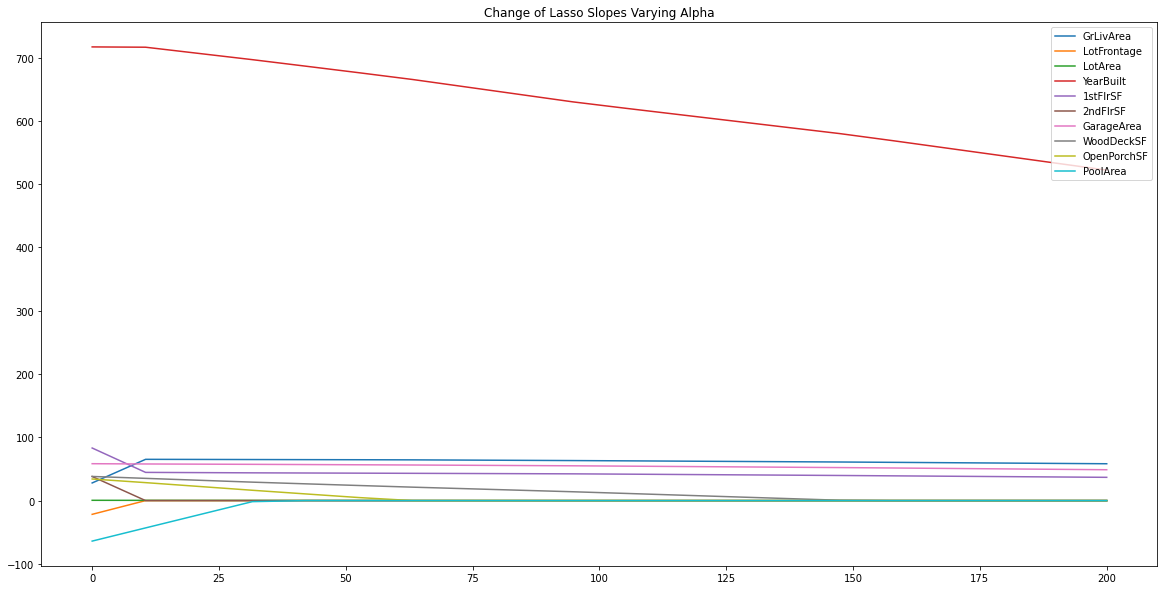

In [219]:
for name in c.columns:
    plt.plot(alphas, c[name], label=name)
    
plt.legend(loc=1)    
plt.title('Change of Lasso Slopes Varying Alpha')

# OverAll House Quality

<AxesSubplot:xlabel='OverallQual', ylabel='SalePrice'>

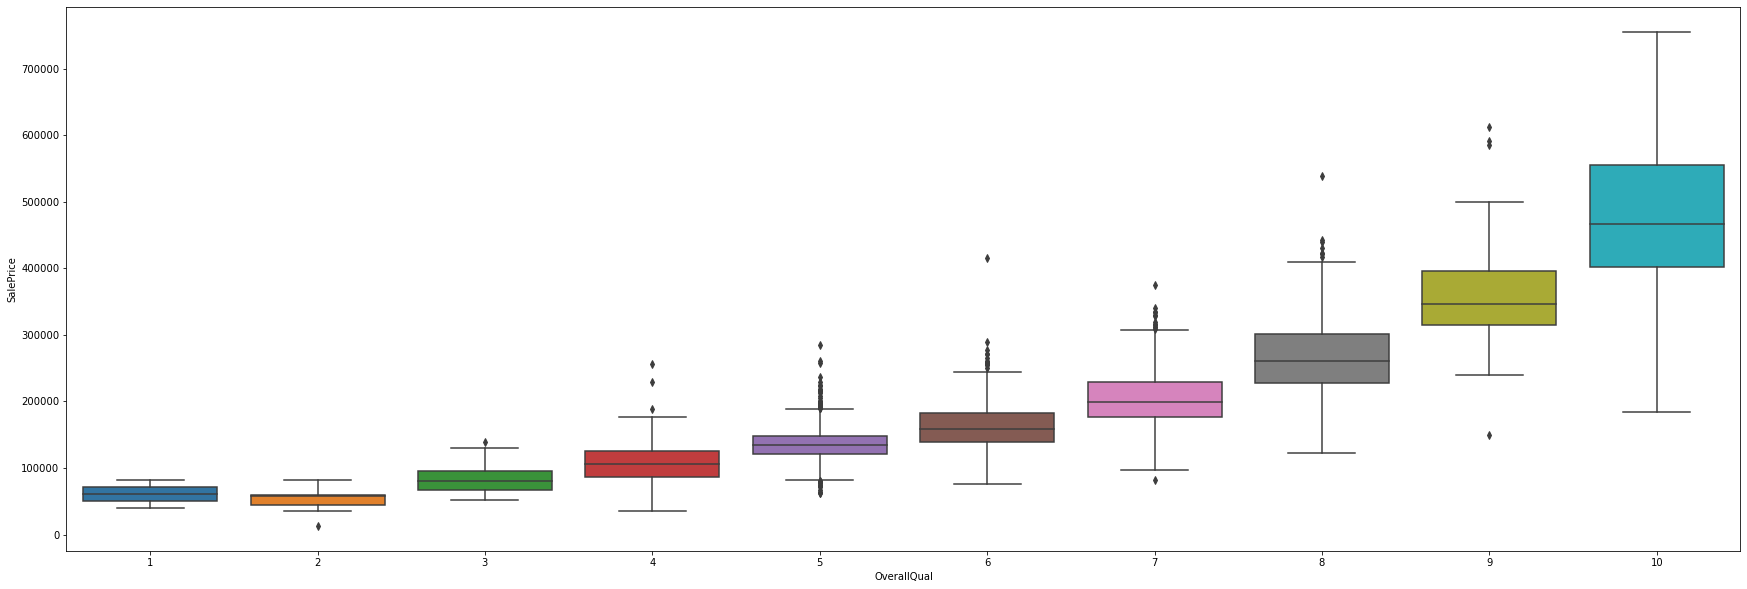

In [151]:
sns.boxplot(x = data['OverallQual'], y = data['SalePrice'])

# Lasso Regression on Garage Data

In [8]:
data.filter(regex = 'Garage').value_counts()
plot_ames(data['GarageFinish'], s = data['SalePrice'])

NameError: name 'plot_ames' is not defined

In [101]:
from sklearn.linear_model import Lasso
lasso = Lasso()
alphas = np.linspace(1e-3,200,num=500)

In [91]:
def run_lasso(d, alphas):
    
    coefs = []
    for alpha in alphas:
        lasso.set_params(alpha = alpha,normalize = True)
        lasso.fit(d,data['SalePrice'])
        lasso.score(d,data['SalePrice'])
        coefs.append(lasso.coef_)
    
    
    coefs = pd.DataFrame(np.array(coefs), columns=d.columns)

    for name in coefs.columns:
        plt.plot(alphas,coefs[name], label = name)
    
    
    plt.legend(loc=1,prop={'size': 20})    
    plt.title('Change of Ridge Slopes Varying Alpha')
        
    
    
    

In [383]:
neighborhood_dummies = pd.get_dummies(data.Neighborhood, drop_first=True)

/Users/charlesphillips/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1785018153775.955, tolerance: 1506141295.56257
  model = cd_fast.enet_coordinate_descent(


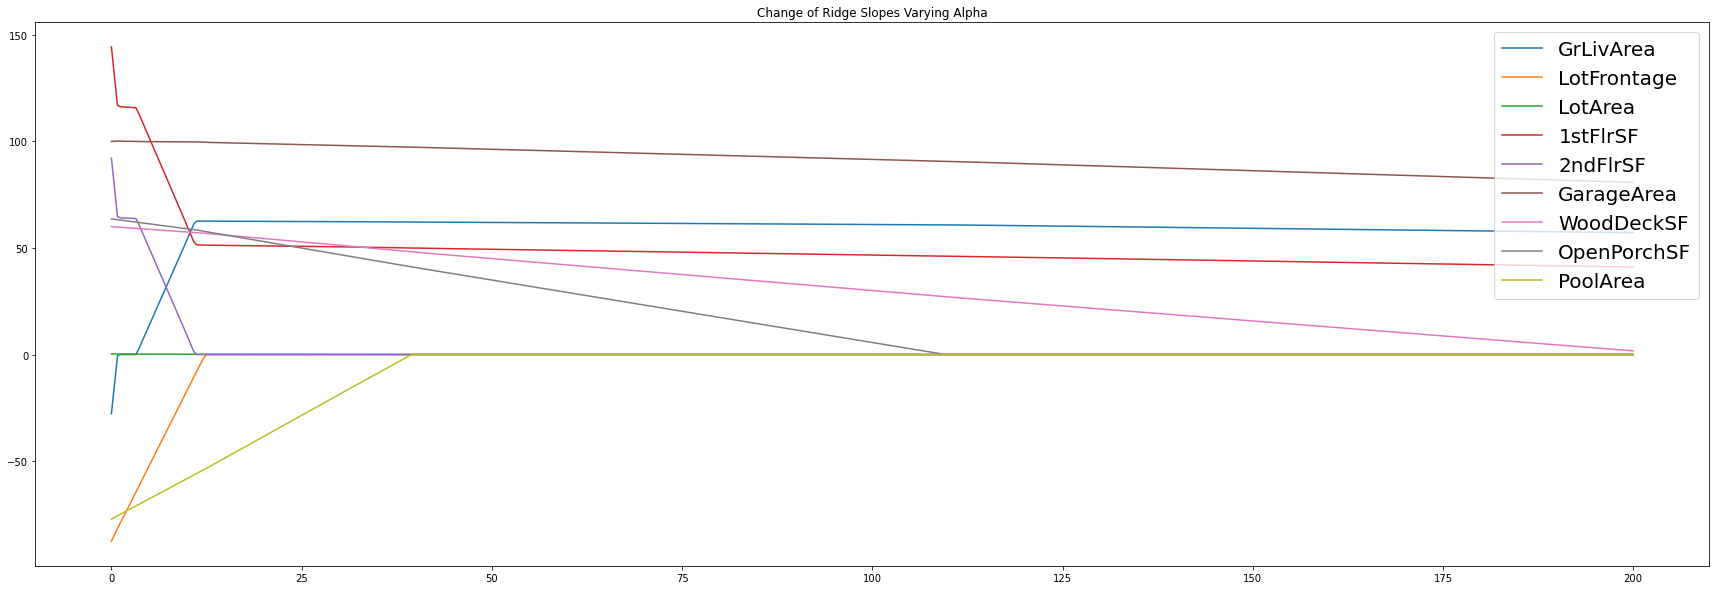

In [380]:
continuous = ['GrLivArea', 'LotFrontage', 'LotArea', '1stFlrSF','2ndFlrSF','GarageArea','WoodDeckSF','OpenPorchSF','PoolArea']
run_lasso(data[continuous], alphas = alphas)


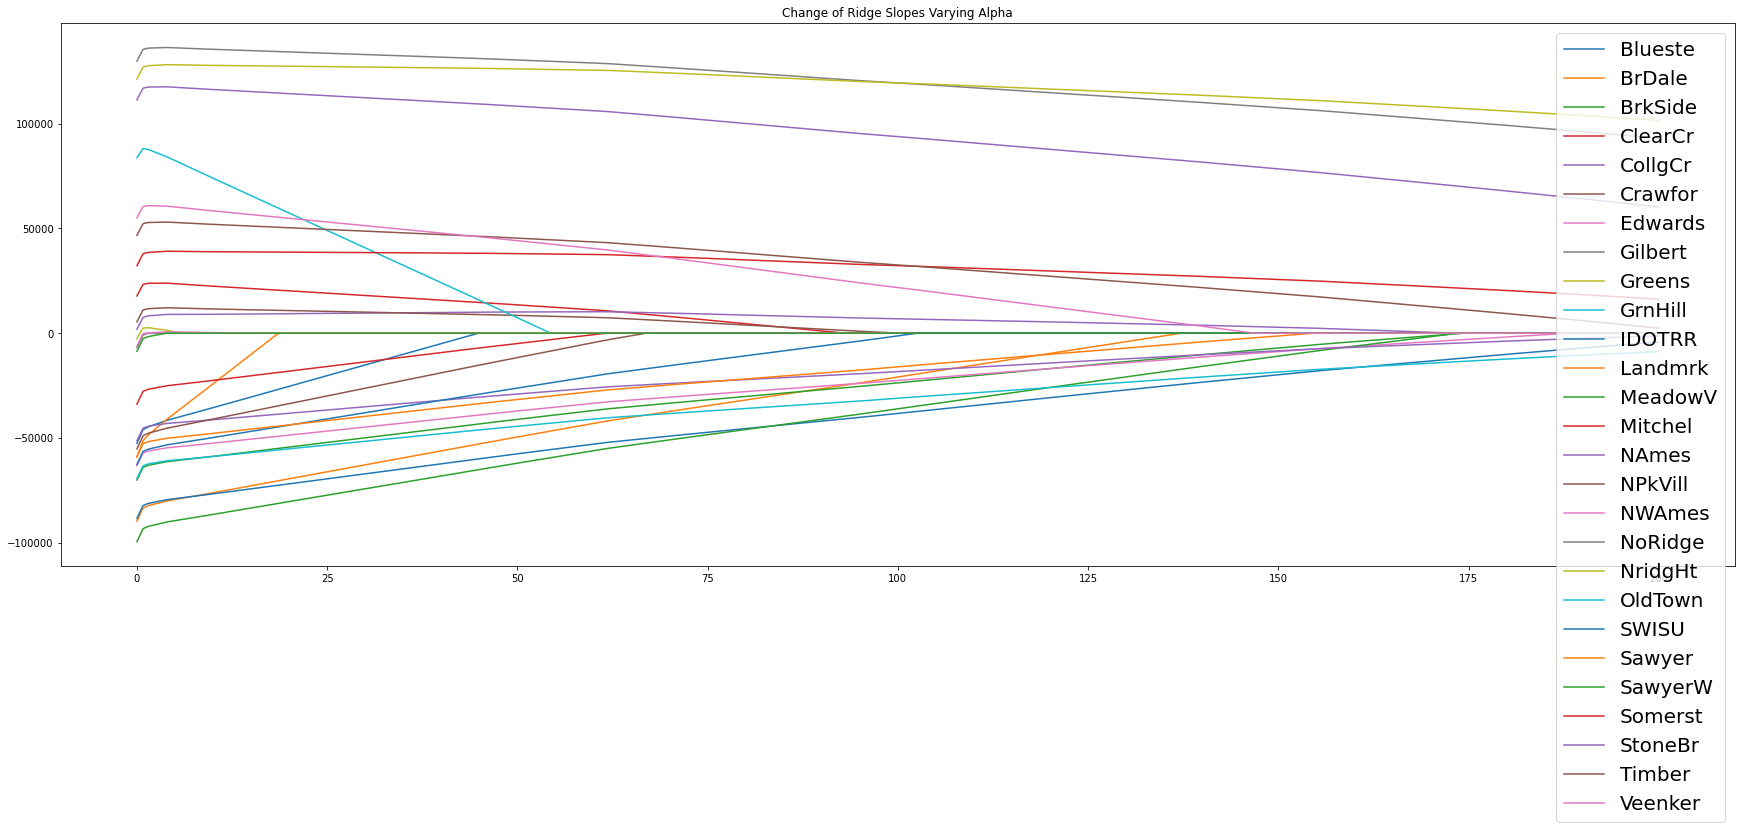

In [392]:
run_lasso(neighborhood_dummies,alphas)

# Clustering

In [343]:
from itertools import combinations
neighborhood_combinations = combinations(data.Neighborhood.unique(),2)

for i, combo in enumerate(neighborhood_combinations):
    sns.histplot(data[data.Neighborhood == combo[0]], x = 'SalePrice', color = 'r', label = combo[0],stat = 'density')
    sns.histplot(data[data.Neighborhood == combo[1]], x = 'SalePrice', color = 'b',alpha = .4, label = combo[1], stat = 'density')
    plt.legend()
    plt.savefig(f'comparing_neighborhoods/{combo[0]}and{combo[1]}.pdf')
    plt.clf()
    print(f'{combo[0]} and {combo[1]}  {i}', end = '\r')

    

<Figure size 2160x720 with 0 Axes>

In [406]:
kmean_data = pd.concat((data[continuous], pd.Series(kmean)),axis = 1)

# KMEANS to try and group neighborhoods

In [588]:
km = KMeans(8).fit_predict(data[factors])

In [589]:
data['km'] = km

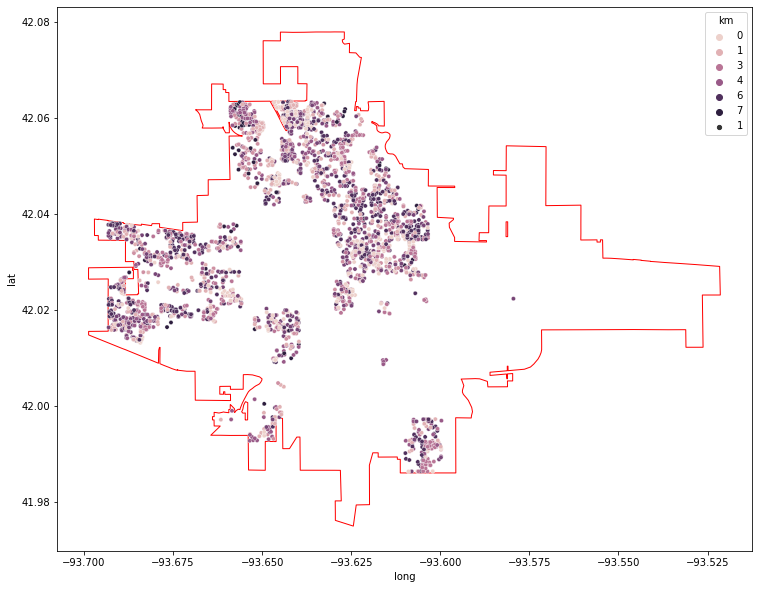

In [590]:
plot_ames(data['km'],1)

   1stFlrSF  OverallQual  YearBuilt  GrLivArea
0       856            6       1939        856
1      1049            5       1984       1049
2      1049            5       1984       1049
3      1001            5       1930       1001
4       717            4       1900       1039


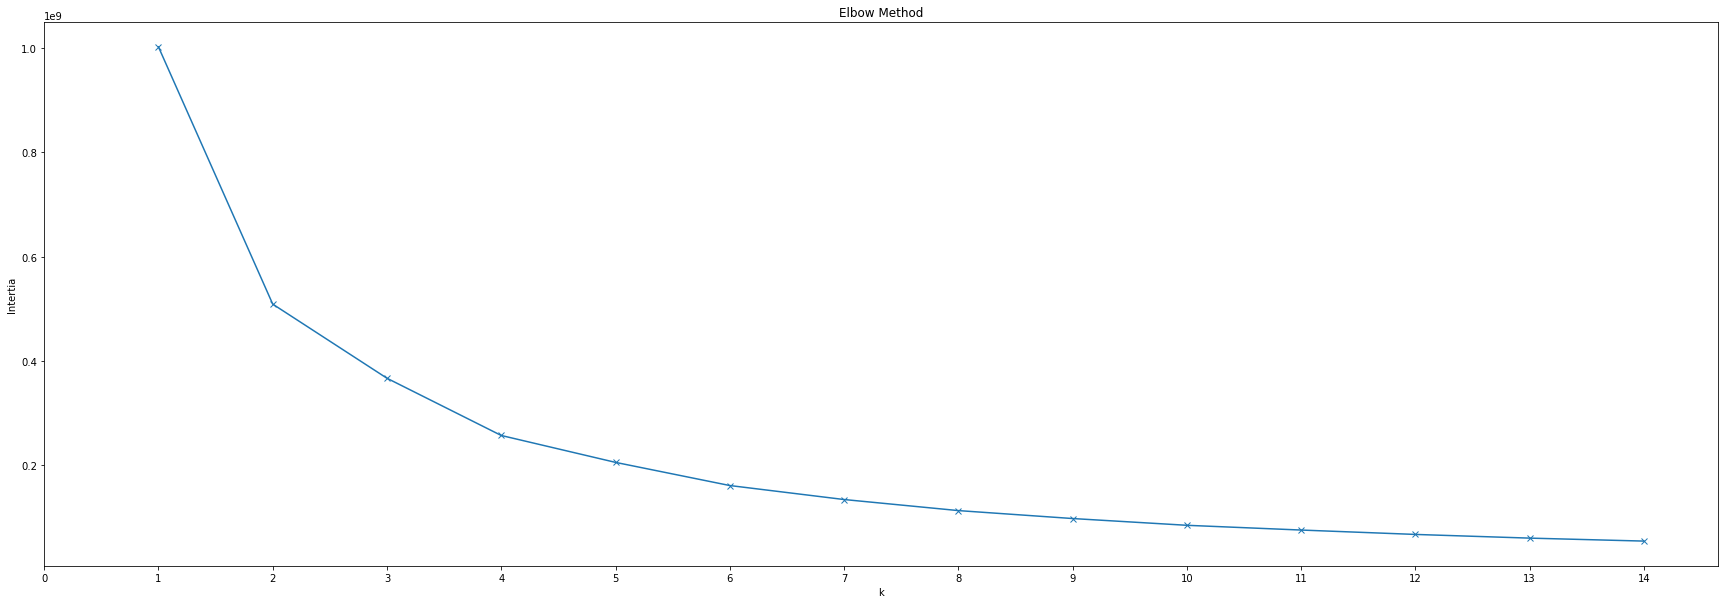

In [595]:
def elbow_test(f): 
    inertia = []
    K = range(1,15)
    X = data[f]
    print(X.head())
    for k in K:
        km = KMeans(n_clusters=k)
        km = km.fit(X)
        inertia.append(km.inertia_)
        
        
        
    plt.plot(K, inertia, marker= "x")
    plt.xlabel('k')
    plt.xticks(np.arange(15))
    plt.ylabel('Intertia')
    plt.title('Elbow Method')
    plt.show()
        
elbow_test(factors)

# Combining some Features

In [599]:
data.drop()

,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,WoodDeckSF,OpenPorchSF,PPSF
0,238.0,0.0,618.0,856.0,856,0,0,0,0,147.196262
1,552.0,393.0,104.0,1049.0,1049,0,0,0,105,132.983794
2,552.0,393.0,104.0,1049.0,1049,0,0,0,105,132.983794
3,737.0,0.0,100.0,837.0,1001,0,0,154,0,124.775225
4,0.0,0.0,405.0,405.0,717,322,0,0,0,109.720885
...,...,...,...,...,...,...,...,...,...,...
2619,0.0,0.0,952.0,952.0,952,0,0,0,98,127.100840
2620,0.0,0.0,0.0,0.0,1733,0,0,0,0,80.553953
2621,284.0,0.0,717.0,1001.0,1001,1001,0,0,0,72.427572
2622,841.0,0.0,144.0,985.0,985,857,0,193,96,118.078176


In [601]:
sns.heatmap(pd.get_dummies(data.filter(regex= 'Garage')), annot = True)

KeyboardInterrupt: 

Error in callback <function flush_figures at 0x7fbb1e6550d0> (for post_execute):


KeyboardInterrupt: 

In [603]:
garage_dummified = pd.get_dummies(data.filter(regex = 'Garage'))

In [607]:
garage_dummified['price'] = data['SalePrice']

<AxesSubplot:>

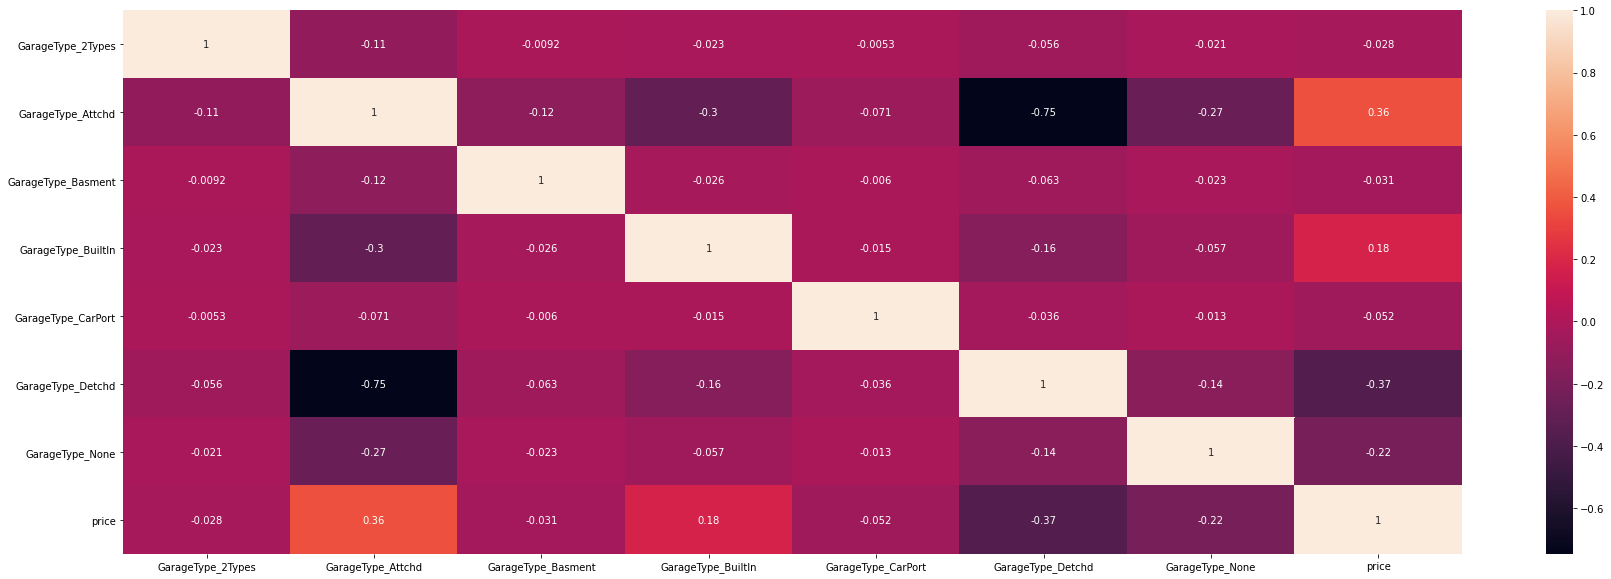

In [610]:
sns.heatmap(garage_dummified.filter(regex = '(GarageType|price)').corr(), annot = True)

In [618]:
data.columns

Index(['PID', 'GrLivArea', 'SalePrice', 'MSSubClass', 'MSZoning',
       'LotFrontage', 'LotArea', 'Street', 'Alley', 'LotShape', 'LandContour',
       'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1',
       'Condition2', 'BldgType', 'HouseStyle', 'OverallQual', 'OverallCond',
       'YearBuilt', 'YearRemodAdd', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'MasVnrArea', 'ExterQual', 'ExterCond',
       'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1',
       'BsmtFinSF1', 'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF',
       '2ndFlrSF', 'LowQualFinSF', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond

In [615]:
data.HeatingQC.value_counts()

Ex    1311
TA     785
Gd     440
Fa      87
Po       1
Name: HeatingQC, dtype: int64

<AxesSubplot:>

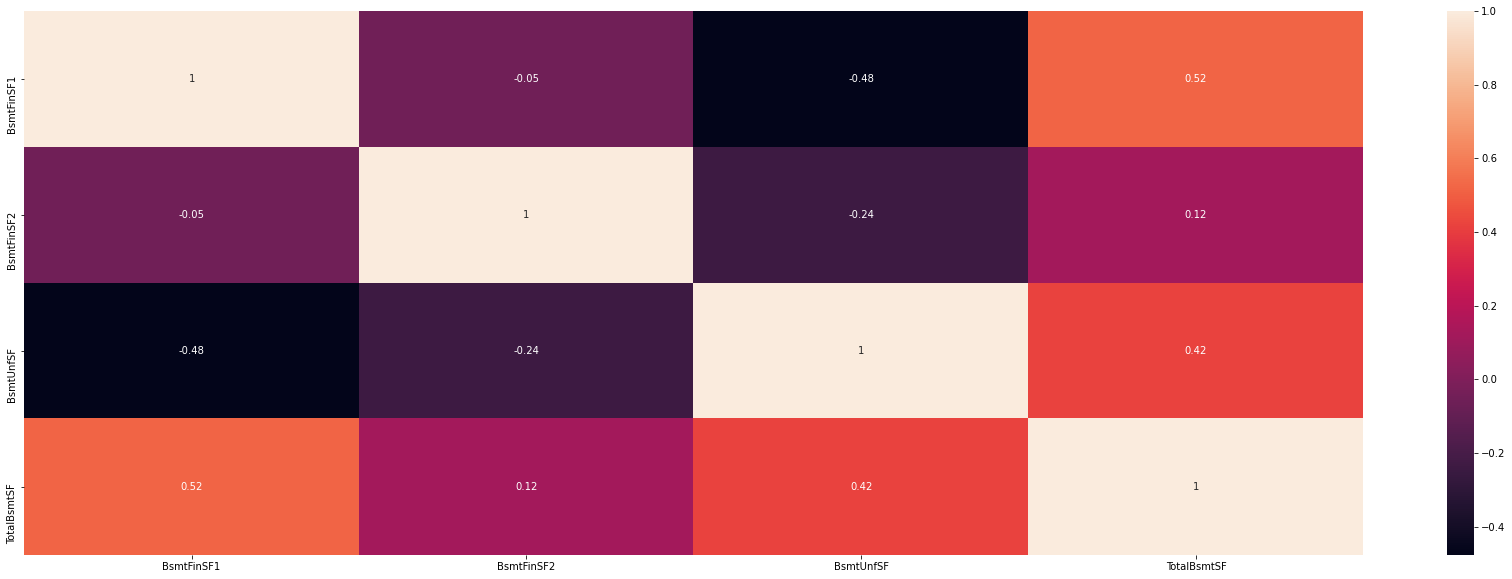

In [621]:
data.filter(regex = 'SF')
sns.heatmap(data[['BsmtFinSF1','BsmtFinSF2','BsmtUnfSF','TotalBsmtSF' ]].corr(), annot = True)

In [10]:
data.head()

,PID,GrLivArea,SalePrice,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,lot_bucket,mean_LotFrontage,Prop_Addr,lat,long
0,909176150,856,126000,30,RL,64.9,7890,Pave,None,Reg,Lvl,AllPub,Corner,Gtl,SWISU,Norm,Norm,1Fam,1Story,6,6,1939,1950,Gable,CompShg,Wd Sdng,Wd Sdng,None,0.0,TA,TA,CBlock,TA,TA,No,Rec,238.0,Unf,0.0,618.0,856.0,GasA,TA,Y,SBrkr,856,0,0,1.0,0.0,1,0,2,1,TA,4,Typ,1,Gd,Detchd,1939.0,Unf,2.0,399.0,TA,TA,Y,0,0,0,0,166,0,None,None,None,0,3,2010,WD,Normal,"(7298.458, 8298.201]",64.93913,436 HAYWARD AVE,42.017780,-93.651452
1,905476230,1049,139500,120,RL,42.0,4235,Pave,None,Reg,Lvl,AllPub,Inside,Gtl,Edwards,Norm,Norm,TwnhsE,1Story,5,5,1984,1984,Gable,CompShg,HdBoard,HdBoard,BrkFace,149.0,Gd,TA,CBlock,Gd,TA,Mn,GLQ,552.0,ALQ,393.0,104.0,1049.0,GasA,TA,Y,SBrkr,1049,0,0,1.0,0.0,2,0,2,1,Gd,5,Typ,0,None,Attchd,1984.0,Fin,1.0,266.0,TA,TA,Y,0,105,0,0,0,0,None,None,None,0,2,2009,WD,Normal,"(3299.486, 4299.229]",46.15493,3416 WEST ST,42.024697,-93.664186
2,905476230,1049,139500,120,RL,42.0,4235,Pave,None,Reg,Lvl,AllPub,Inside,Gtl,Edwards,Norm,Norm,TwnhsE,1Story,5,5,1984,1984,Gable,CompShg,HdBoard,HdBoard,BrkFace,149.0,Gd,TA,CBlock,Gd,TA,Mn,GLQ,552.0,ALQ,393.0,104.0,1049.0,GasA,TA,Y,SBrkr,1049,0,0,1.0,0.0,2,0,2,1,Gd,5,Typ,0,None,Attchd,1984.0,Fin,1.0,266.0,TA,TA,Y,0,105,0,0,0,0,None,None,None,0,2,2009,WD,Normal,"(3299.486, 4299.229]",46.15493,3416 WEST ST,42.024697,-93.664186
3,911128020,1001,124900,30,C (all),60.0,6060,Pave,None,Reg,Lvl,AllPub,Inside,Gtl,IDOTRR,Norm,Norm,1Fam,1Story,5,9,1930,2007,Hip,CompShg,MetalSd,MetalSd,None,0.0,Gd,TA,BrkTil,TA,TA,No,ALQ,737.0,Unf,0.0,100.0,837.0,GasA,Ex,Y,SBrkr,1001,0,0,0.0,0.0,1,0,2,1,Gd,5,Typ,0,None,Detchd,1930.0,Unf,1.0,216.0,TA,Po,N,154,0,42,86,0,0,None,None,None,0,11,2007,WD,Normal,"(5298.972, 6298.715]",54.06015,320 S 2ND ST,42.021389,-93.614855
4,535377150,1039,114000,70,RL,80.0,8146,Pave,None,Reg,Lvl,AllPub,Corner,Gtl,OldTown,Norm,Norm,1Fam,2Story,4,8,1900,2003,Gable,CompShg,MetalSd,MetalSd,None,0.0,Gd,Gd,BrkTil,Fa,TA,No,Unf,0.0,Unf,0.0,405.0,405.0,GasA,Gd,Y,SBrkr,717,322,0,0.0,0.0,1,0,2,1,TA,6,Typ,0,None,Detchd,1940.0,Unf,1.0,281.0,TA,TA,N,0,0,168,0,111,0,None,None,None,0,5,2009,WD,Normal,"(7298.458, 8298.201]",64.93913,1524 DOUGLAS AVE,42.038070,-93.612065


In [19]:
data.filter(regex = '(Qual|Cond)').value_counts()
data.BsmtQual.value_counts()

TA      1188
Gd      1093
Ex       191
Fa        80
None      70
Po         2
Name: BsmtQual, dtype: int64

In [22]:
mapping_dict = {'None' : np.nan,
                'Po' :  1,
                'Fa' : 2,
                'TA' : 3,
                'Gd' : 4,
                'Ex' : 5}

In [25]:
data.BsmtCond.apply(lambda r : mapping_dict[r]).unique()

array([ 3., nan,  2.,  4.,  5.,  1.])

In [42]:
data.head()

,PID,GrLivArea,SalePrice,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,lot_bucket,mean_LotFrontage,Prop_Addr,lat,long
0,909176150,856,126000,30,RL,64.9,7890,Pave,None,Reg,Lvl,AllPub,Corner,Gtl,SWISU,Norm,Norm,1Fam,1Story,6,6,1939,1950,Gable,CompShg,Wd Sdng,Wd Sdng,None,0.0,TA,TA,CBlock,TA,TA,No,Rec,238.0,Unf,0.0,618.0,856.0,GasA,TA,Y,SBrkr,856,0,0,1.0,0.0,1,0,2,1,TA,4,Typ,1,Gd,Detchd,1939.0,Unf,2.0,399.0,TA,TA,Y,0,0,0,0,166,0,None,None,None,0,3,2010,WD,Normal,"(7298.458, 8298.201]",64.93913,436 HAYWARD AVE,42.017780,-93.651452
1,905476230,1049,139500,120,RL,42.0,4235,Pave,None,Reg,Lvl,AllPub,Inside,Gtl,Edwards,Norm,Norm,TwnhsE,1Story,5,5,1984,1984,Gable,CompShg,HdBoard,HdBoard,BrkFace,149.0,Gd,TA,CBlock,Gd,TA,Mn,GLQ,552.0,ALQ,393.0,104.0,1049.0,GasA,TA,Y,SBrkr,1049,0,0,1.0,0.0,2,0,2,1,Gd,5,Typ,0,None,Attchd,1984.0,Fin,1.0,266.0,TA,TA,Y,0,105,0,0,0,0,None,None,None,0,2,2009,WD,Normal,"(3299.486, 4299.229]",46.15493,3416 WEST ST,42.024697,-93.664186
2,905476230,1049,139500,120,RL,42.0,4235,Pave,None,Reg,Lvl,AllPub,Inside,Gtl,Edwards,Norm,Norm,TwnhsE,1Story,5,5,1984,1984,Gable,CompShg,HdBoard,HdBoard,BrkFace,149.0,Gd,TA,CBlock,Gd,TA,Mn,GLQ,552.0,ALQ,393.0,104.0,1049.0,GasA,TA,Y,SBrkr,1049,0,0,1.0,0.0,2,0,2,1,Gd,5,Typ,0,None,Attchd,1984.0,Fin,1.0,266.0,TA,TA,Y,0,105,0,0,0,0,None,None,None,0,2,2009,WD,Normal,"(3299.486, 4299.229]",46.15493,3416 WEST ST,42.024697,-93.664186
3,911128020,1001,124900,30,C (all),60.0,6060,Pave,None,Reg,Lvl,AllPub,Inside,Gtl,IDOTRR,Norm,Norm,1Fam,1Story,5,9,1930,2007,Hip,CompShg,MetalSd,MetalSd,None,0.0,Gd,TA,BrkTil,TA,TA,No,ALQ,737.0,Unf,0.0,100.0,837.0,GasA,Ex,Y,SBrkr,1001,0,0,0.0,0.0,1,0,2,1,Gd,5,Typ,0,None,Detchd,1930.0,Unf,1.0,216.0,TA,Po,N,154,0,42,86,0,0,None,None,None,0,11,2007,WD,Normal,"(5298.972, 6298.715]",54.06015,320 S 2ND ST,42.021389,-93.614855
4,535377150,1039,114000,70,RL,80.0,8146,Pave,None,Reg,Lvl,AllPub,Corner,Gtl,OldTown,Norm,Norm,1Fam,2Story,4,8,1900,2003,Gable,CompShg,MetalSd,MetalSd,None,0.0,Gd,Gd,BrkTil,Fa,TA,No,Unf,0.0,Unf,0.0,405.0,405.0,GasA,Gd,Y,SBrkr,717,322,0,0.0,0.0,1,0,2,1,TA,6,Typ,0,None,Detchd,1940.0,Unf,1.0,281.0,TA,TA,N,0,0,168,0,111,0,None,None,None,0,5,2009,WD,Normal,"(7298.458, 8298.201]",64.93913,1524 DOUGLAS AVE,42.038070,-93.612065


In [72]:
ordinals = ['BsmtQual','BsmtCond',
            'ExterQual','ExterCond',
            'KitchenQual','GarageQual',
            'GarageCond', 'HeatingQC']

In [60]:
data[ordinals] = data[ordinals].applymap(mapping_dict.get)

In [79]:
# Garage Area is collinear with garage cars

data = data.drop('GarageCars',axis = 1)


<AxesSubplot:>

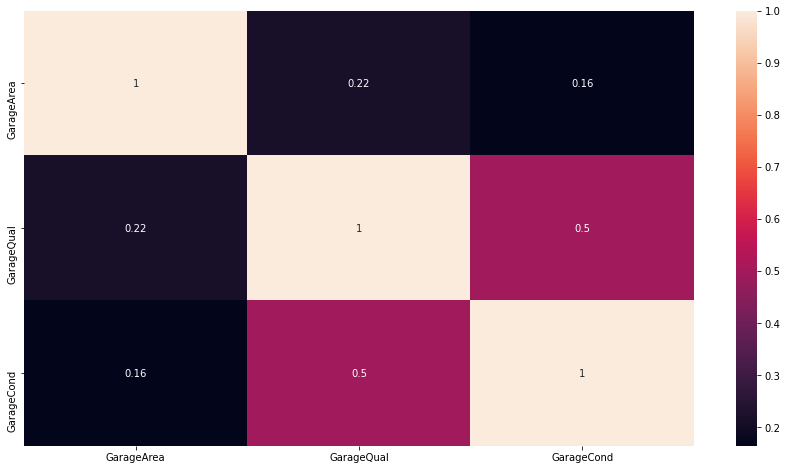

In [80]:
sns.heatmap(data.filter(regex = 'Garage').corr(), annot = True)

In [84]:
data.filter(regex = 'K').corr()

,KitchenAbvGr,KitchenQual
KitchenAbvGr,1.000000,-0.153611
KitchenQual,-0.153611,1.000000


In [85]:
data.columns

Index(['PID', 'GrLivArea', 'SalePrice', 'MSSubClass', 'MSZoning',
       'LotFrontage', 'LotArea', 'Street', 'Alley', 'LotShape', 'LandContour',
       'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1',
       'Condition2', 'BldgType', 'HouseStyle', 'OverallQual', 'OverallCond',
       'YearBuilt', 'YearRemodAdd', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'MasVnrArea', 'ExterQual', 'ExterCond',
       'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1',
       'BsmtFinSF1', 'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF',
       '2ndFlrSF', 'LowQualFinSF', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageArea', 'GarageQual', 'GarageCond',
       'PavedDrive

In [89]:
data.columns.sort_values()

Index(['1stFlrSF', '2ndFlrSF', '3SsnPorch', 'Alley', 'BedroomAbvGr',
       'BldgType', 'BsmtCond', 'BsmtExposure', 'BsmtFinSF1', 'BsmtFinSF2',
       'BsmtFinType1', 'BsmtFinType2', 'BsmtFullBath', 'BsmtHalfBath',
       'BsmtQual', 'BsmtUnfSF', 'CentralAir', 'Condition1', 'Condition2',
       'Electrical', 'EnclosedPorch', 'ExterCond', 'ExterQual', 'Exterior1st',
       'Exterior2nd', 'Fence', 'FireplaceQu', 'Fireplaces', 'Foundation',
       'FullBath', 'Functional', 'GarageArea', 'GarageCond', 'GarageFinish',
       'GarageQual', 'GarageType', 'GarageYrBlt', 'GrLivArea', 'HalfBath',
       'Heating', 'HeatingQC', 'HouseStyle', 'KitchenAbvGr', 'KitchenQual',
       'LandContour', 'LandSlope', 'LotArea', 'LotConfig', 'LotFrontage',
       'LotShape', 'LowQualFinSF', 'MSSubClass', 'MSZoning', 'MasVnrArea',
       'MasVnrType', 'MiscFeature', 'MiscVal', 'MoSold', 'Neighborhood',
       'OpenPorchSF', 'OverallCond', 'OverallQual', 'PID', 'PavedDrive',
       'PoolArea', 'PoolQC', 'Prop_

In [98]:
data.filter(regex = 'SF')

,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,WoodDeckSF,OpenPorchSF
0,238.0,0.0,618.0,856.0,856,0,0,0,0
1,552.0,393.0,104.0,1049.0,1049,0,0,0,105
2,552.0,393.0,104.0,1049.0,1049,0,0,0,105
3,737.0,0.0,100.0,837.0,1001,0,0,154,0
4,0.0,0.0,405.0,405.0,717,322,0,0,0
...,...,...,...,...,...,...,...,...,...
2619,0.0,0.0,952.0,952.0,952,0,0,0,98
2620,0.0,0.0,0.0,0.0,1733,0,0,0,0
2621,284.0,0.0,717.0,1001.0,1001,1001,0,0,0
2622,841.0,0.0,144.0,985.0,985,857,0,193,96


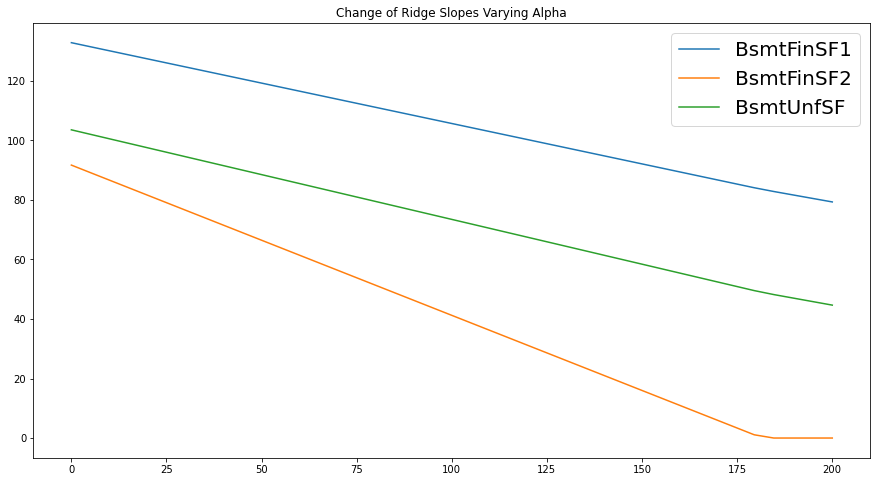

In [102]:
alphas = np.linspace(.001,200,num = 40)
run_lasso(data[['BsmtFinSF1','BsmtFinSF2','BsmtUnfSF']],alphas)

<AxesSubplot:>

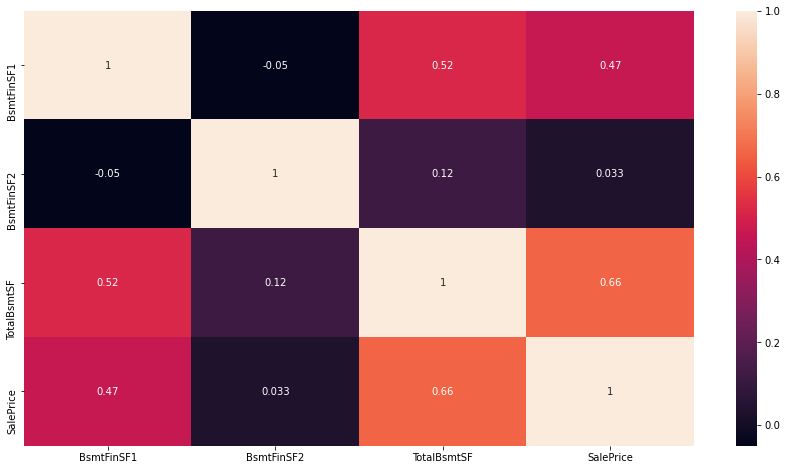

In [106]:
sns.heatmap(data[['BsmtFinSF1','BsmtFinSF2','TotalBsmtSF','SalePrice']].corr(), annot = True)

In [191]:
# for c in data.columns:
#     print(f'****** {c} ******')
#     print(data[c].value_counts()/len(data))
#     print()


In [121]:
# for c in data.columns:
#     data.groupby(c)
    
data.groupby('SaleCondition').size()

SaleCondition
Abnorml      61
AdjLand       2
Alloca        4
Family       17
Normal     2457
Partial      83
dtype: int64

In [132]:
data[data.Street == 'Grvl']

,PID,GrLivArea,SalePrice,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,lot_bucket,mean_LotFrontage,Prop_Addr,lat,long
589,527175130,1128,154204,20,RL,160.000000,18160,Grvl,None,Reg,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,1Story,6,6,1964,1964,Gable,CompShg,HdBoard,HdBoard,BrkCmn,138.0,3,3,CBlock,3.0,3.0,Av,BLQ,550.0,Unf,0.0,752.0,1302.0,GasA,2,Y,SBrkr,1128,0,0,1.0,0.0,1,0,3,1,3,6,Typ,1,TA,Attchd,1964.0,Unf,480.0,3.0,3.0,P,0,108,246,0,0,0,None,MnPrv,None,0,3,2007,WD,Alloca,"(17295.888, 18295.631]",99.176471,1711 TOP O HOLLOW RD,42.057022,-93.633329
846,911226010,894,81000,30,C (all),120.000000,18000,Grvl,None,Reg,Low,AllPub,Inside,Gtl,IDOTRR,Norm,Norm,1Fam,1Story,3,4,1935,1950,Gable,CompShg,MetalSd,MetalSd,None,0.0,2,3,CBlock,3.0,3.0,No,Unf,0.0,Unf,0.0,894.0,894.0,GasA,3,Y,SBrkr,894,0,0,0.0,0.0,1,0,2,1,3,6,Typ,0,None,Detchd,1994.0,RFn,1248.0,3.0,3.0,Y,0,20,0,0,0,0,None,None,Shed,560,8,2008,ConLD,Normal,"(17295.888, 18295.631]",99.176471,130 CHERRY AVE,42.021800,-93.603928
952,903452025,768,93850,30,RM,54.100000,6291,Grvl,None,IR1,Lvl,AllPub,Inside,Gtl,IDOTRR,RRNe,Norm,1Fam,1Story,6,6,1930,1950,Gable,CompShg,Stucco,Wd Shng,None,0.0,4,4,BrkTil,3.0,3.0,No,Unf,0.0,Unf,0.0,768.0,768.0,GasA,3,Y,SBrkr,768,0,0,0.0,0.0,1,0,1,1,3,4,Typ,0,None,Detchd,1930.0,Unf,440.0,3.0,3.0,N,0,0,84,0,0,0,None,None,None,0,7,2008,WD,Normal,"(5298.972, 6298.715]",54.060150,1114 N 4TH ST,42.025540,-93.625995
1096,908127100,816,118500,90,RL,81.000000,11841,Grvl,None,Reg,Lvl,AllPub,Inside,Gtl,Edwards,Norm,Norm,Duplex,SFoyer,6,5,1990,1990,Gable,CompShg,HdBoard,HdBoard,BrkFace,104.0,3,4,CBlock,4.0,3.0,Av,GLQ,816.0,Unf,0.0,0.0,816.0,GasA,3,Y,SBrkr,816,0,0,1.0,0.0,1,0,3,1,3,5,Typ,0,None,None,None,None,0.0,NaN,NaN,Y,0,32,0,0,0,0,None,None,None,0,5,2007,WD,Normal,"(11297.43, 12297.173]",82.476510,4025 APLIN RD,42.020089,-93.672366
1359,911226030,864,65000,70,C (all),60.000000,9000,Grvl,None,Reg,Bnk,AllPub,Inside,Gtl,IDOTRR,Norm,Norm,1Fam,2Story,4,6,1920,1950,Gable,CompShg,MetalSd,MetalSd,None,0.0,3,3,Stone,2.0,2.0,Mn,Unf,0.0,Unf,0.0,592.0,592.0,GasA,5,Y,SBrkr,432,432,0,0.0,0.0,1,1,3,1,2,5,Min2,0,None,Detchd,1920.0,Unf,216.0,2.0,2.0,N,0,30,160,0,0,0,None,None,None,0,6,2008,WD,Normal,"(8298.201, 9297.944]",68.724832,116 CHERRY AVE,42.022219,-93.604102
1568,911225110,936,78000,50,C (all),60.000000,8520,Grvl,None,Reg,Bnk,AllPub,Inside,Gtl,IDOTRR,Norm,Norm,1Fam,1.5Fin,3,5,1916,1950,Gable,CompShg,MetalSd,MetalSd,None,0.0,3,3,PConc,2.0,2.0,No,Unf,0.0,Unf,0.0,216.0,216.0,GasA,2,N,SBrkr,576,360,0,0.0,0.0,1,0,2,1,3,6,Typ,0,None,None,None,None,0.0,NaN,NaN,N,0,0,0,0,0,0,None,None,None,0,4,2006,WD,Normal,"(8298.201, 9297.944]",68.724832,119 CHERRY AVE,42.022071,-93.604518
1569,911225110,936,78000,50,C (all),60.000000,8520,Grvl,None,Reg,Bnk,AllPub,Inside,Gtl,IDOTRR,Norm,Norm,1Fam,1.5Fin,3,5,1916,1950,Gable,CompShg,MetalSd,MetalSd,None,0.0,3,3,PConc,2.0,2.0,No,Unf,0.0,Unf,0.0,216.0,216.0,GasA,2,N,SBrkr,576,360,0,0.0,0.0,1,0,2,1,3,6,Typ,0,None,None,None,None,0.0,NaN,NaN,N,0,0,0,0,0,0,None,None,None,0,4,2006,WD,Normal,"(8298.201, 9297.944]",68.724832,119 CHERRY AVE,42.022071,-93.604518
1661,916125425,1786,228950,190,RL,408.707307,164660,Grvl,None,IR1,HLS,AllPub,Corner,Sev,Timber,Norm,Norm,2fmCon,1.5Fin,5,6,1965,1965,G

<AxesSubplot:>

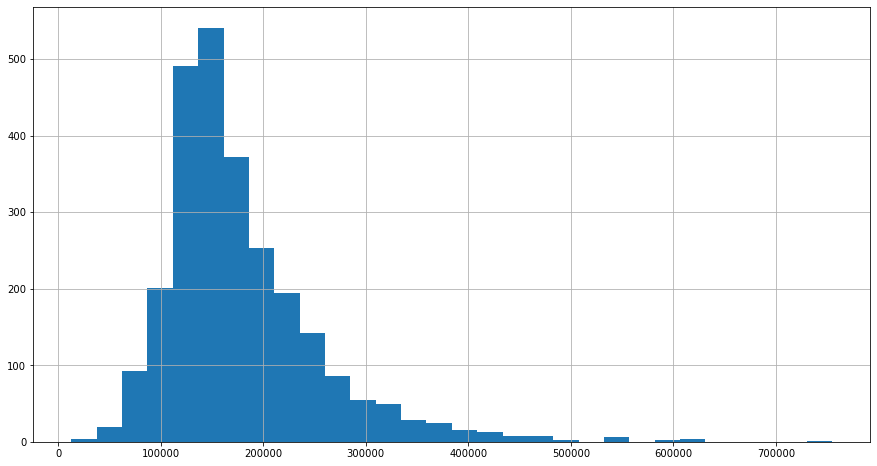

In [130]:
data[data.Street == 'Pave'].SalePrice.hist(bins = 30)

In [137]:
data[data.PoolArea != 0]

,PID,GrLivArea,SalePrice,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,lot_bucket,mean_LotFrontage,Prop_Addr,lat,long
70,528164060,2470,615000,20,RL,106.0,12720,Pave,None,Reg,HLS,AllPub,Inside,Mod,NridgHt,Norm,Norm,1Fam,1Story,10,5,2003,2003,Hip,CompShg,MetalSd,MetalSd,Stone,680.0,5,3,PConc,5.0,3.0,Gd,GLQ,2257.0,Unf,0.0,278.0,2535.0,GasA,5,Y,SBrkr,2470,0,0,2.0,0.0,1,1,1,1,5,7,Typ,2,Gd,Attchd,2003.0,Fin,789.0,3.0,3.0,Y,154,65,0,0,216,144,Ex,None,None,0,2,2008,WD,Normal,"(12297.173, 13296.916]",82.495146,3320 FOXLEY DR,42.058348,-93.657589
494,532476050,2646,260000,80,RL,100.0,14330,Pave,None,IR1,Low,AllPub,Corner,Gtl,Veenker,Norm,Norm,1Fam,SLvl,7,4,1974,1974,Gable,CompShg,WdShing,Wd Sdng,BrkFace,145.0,4,2,CBlock,4.0,3.0,Gd,ALQ,1023.0,BLQ,497.0,228.0,1748.0,GasA,4,Y,SBrkr,2151,495,0,1.0,2.0,2,0,3,1,4,9,Mod,4,TA,Attchd,1974.0,RFn,550.0,3.0,3.0,Y,641,100,0,0,0,800,Gd,GdPrv,None,0,1,2006,WD,Normal,"(14296.659, 15296.402]",86.243243,1601 AMHERST DR,42.037402,-93.660700
602,527356020,2784,250000,60,RL,80.0,16692,Pave,None,IR1,Lvl,AllPub,Inside,Gtl,NWAmes,RRAn,Norm,1Fam,2Story,7,5,1978,1978,Gable,CompShg,Plywood,Plywood,BrkFace,184.0,3,3,CBlock,4.0,3.0,No,BLQ,790.0,LwQ,469.0,133.0,1392.0,GasA,3,Y,SBrkr,1392,1392,0,1.0,0.0,3,1,5,1,4,12,Typ,2,TA,Attchd,1978.0,RFn,564.0,3.0,3.0,Y,0,112,0,0,440,519,Fa,MnPrv,TenC,2000,7,2006,WD,Normal,"(16296.145, 17295.888]",91.476190,2935 EISENHOWER AVE,42.051068,-93.638113
1200,906200230,1822,228500,50,RL,104.0,23920,Pave,None,Reg,Lvl,AllPub,Inside,Gtl,SawyerW,Feedr,Norm,1Fam,1.5Fin,6,5,1984,1984,Gable,CompShg,Wd Sdng,Wd Sdng,None,0.0,3,3,CBlock,3.0,3.0,No,Unf,0.0,Unf,0.0,1105.0,1105.0,GasA,5,Y,SBrkr,1105,717,0,0.0,0.0,2,0,4,1,4,7,Min2,1,Po,Attchd,1984.0,Unf,515.0,3.0,3.0,P,0,195,1012,0,0,444,TA,None,None,0,4,2007,WD,Normal,"(23294.346, 24294.089]",86.500000,5010 ONTARIO ST,42.034071,-93.686558
1441,527377030,1309,181000,20,RL,78.0,10140,Pave,None,Reg,Lvl,AllPub,Inside,Gtl,NWAmes,Norm,Norm,1Fam,1Story,6,6,1974,1999,Hip,CompShg,HdBoard,HdBoard,BrkFace,99.0,3,3,CBlock,3.0,3.0,No,ALQ,663.0,LwQ,377.0,0.0,1040.0,GasA,2,Y,SBrkr,1309,0,0,1.0,0.0,1,1,3,1,4,5,Typ,1,Fa,Attchd,1974.0,RFn,484.0,3.0,3.0,Y,265,0,0,0,0,648,Fa,GdPrv,None,0,1,2006,WD,Normal,"(9297.944, 10297.687]",74.055556,1509 JACKSON DR,42.049934,-93.631079
1696,909475230,2726,315000,20,RL,70.0,18044,Pave,None,IR1,HLS,AllPub,CulDSac,Gtl,Crawfor,Norm,Norm,1Fam,1Story,8,5,1986,1986,Gable,CompShg,WdShing,Plywood,None,0.0,4,3,CBlock,4.0,3.0,No,Unf,0.0,Unf,0.0,279.0,279.0,GasA,4,Y,SBrkr,2726,0,0,0.0,0.0,2,1,2,1,4,6,Typ,1,Gd,Attchd,1986.0,Fin,691.0,4.0,4.0,Y,216,64,169,0,0,228,Ex,None,None,0,8,2007,WD,Normal,"(17295.888, 18295.631]",99.176471,2027 INDIANGRASS CT,42.009925,-93.641873
2041,923202220,2034,130000,20,RL,200.0,43500,Pave,None,Reg,Lvl,AllPub,Inside,Gtl,Mitchel,Artery,Norm,1Fam,1Story,3,5,1953,1953,Gable,CompShg,MetalSd,MetalSd,None,0.0,3,3,CBlock,NaN,NaN,None,None,0.0,None,0.0,0.0,0.0,GasA,5,Y,SBrkr,2034,0,0,0.0,0.0,1,0,2,1,3,9,Min1,0,None,2Types,1953.0,RFn,1041.0,3.0,3.0,N,483,266,0,0,0,561,TA,GdPrv,None,0,6,2007,WD,Normal,"(43289.206, 44288.949]",200.000000,3312 S DUFF AVE,41.992718,-93.609711
2465,914475020,1118,171000,80,RL,76.0,9880,Pave,None,Reg,Lvl,AllPub,Inside,Gtl,Mitchel,Norm,

In [140]:
data.columns.sort_values()

Index(['1stFlrSF', '2ndFlrSF', '3SsnPorch', 'Alley', 'BedroomAbvGr',
       'BldgType', 'BsmtCond', 'BsmtExposure', 'BsmtFinSF1', 'BsmtFinSF2',
       'BsmtFinType1', 'BsmtFinType2', 'BsmtFullBath', 'BsmtHalfBath',
       'BsmtQual', 'BsmtUnfSF', 'CentralAir', 'Condition1', 'Condition2',
       'Electrical', 'EnclosedPorch', 'ExterCond', 'ExterQual', 'Exterior1st',
       'Exterior2nd', 'Fence', 'FireplaceQu', 'Fireplaces', 'Foundation',
       'FullBath', 'Functional', 'GarageArea', 'GarageCond', 'GarageFinish',
       'GarageQual', 'GarageType', 'GarageYrBlt', 'GrLivArea', 'HalfBath',
       'Heating', 'HeatingQC', 'HouseStyle', 'KitchenAbvGr', 'KitchenQual',
       'LandContour', 'LandSlope', 'LotArea', 'LotConfig', 'LotFrontage',
       'LotShape', 'LowQualFinSF', 'MSSubClass', 'MSZoning', 'MasVnrArea',
       'MasVnrType', 'MiscFeature', 'MiscVal', 'MoSold', 'Neighborhood',
       'OpenPorchSF', 'OverallCond', 'OverallQual', 'PID', 'PavedDrive',
       'PoolArea', 'PoolQC', 'Prop_

In [142]:
data.filter(regex = 'SF|Gr')

,GrLivArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,WoodDeckSF,OpenPorchSF
0,856,238.0,0.0,618.0,856.0,856,0,0,2,1,4,0,0
1,1049,552.0,393.0,104.0,1049.0,1049,0,0,2,1,5,0,105
2,1049,552.0,393.0,104.0,1049.0,1049,0,0,2,1,5,0,105
3,1001,737.0,0.0,100.0,837.0,1001,0,0,2,1,5,154,0
4,1039,0.0,0.0,405.0,405.0,717,322,0,2,1,6,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2619,952,0.0,0.0,952.0,952.0,952,0,0,2,1,4,0,98
2620,1733,0.0,0.0,0.0,0.0,1733,0,0,4,1,8,0,0
2621,2002,284.0,0.0,717.0,1001.0,1001,1001,0,4,2,8,0,0
2622,1842,841.0,0.0,144.0,985.0,985,857,0,3,1,7,193,96


In [147]:
data[['BsmtFinSF1','BsmtFinSF2','BsmtUnfSF','TotalBsmtSF','SalePrice']].corr()

,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,SalePrice
BsmtFinSF1,1.000000,-0.050065,-0.476770,0.516684,0.465323
BsmtFinSF2,-0.050065,1.000000,-0.239638,0.119499,0.033465
BsmtUnfSF,-0.476770,-0.239638,1.000000,0.422712,0.171276
TotalBsmtSF,0.516684,0.119499,0.422712,1.000000,0.659358
SalePrice,0.465323,0.033465,0.171276,0.659358,1.000000


In [153]:
data.columns.sort_values()

Index(['1stFlrSF', '2ndFlrSF', '3SsnPorch', 'Alley', 'BedroomAbvGr',
       'BldgType', 'BsmtCond', 'BsmtExposure', 'BsmtFinSF1', 'BsmtFinSF2',
       'BsmtFinType1', 'BsmtFinType2', 'BsmtFullBath', 'BsmtHalfBath',
       'BsmtQual', 'BsmtUnfSF', 'CentralAir', 'Condition1', 'Condition2',
       'Electrical', 'EnclosedPorch', 'ExterCond', 'ExterQual', 'Exterior1st',
       'Exterior2nd', 'Fence', 'FireplaceQu', 'Fireplaces', 'Foundation',
       'FullBath', 'Functional', 'GarageArea', 'GarageCond', 'GarageFinish',
       'GarageQual', 'GarageType', 'GarageYrBlt', 'GrLivArea', 'HalfBath',
       'Heating', 'HeatingQC', 'HouseStyle', 'KitchenAbvGr', 'KitchenQual',
       'LandContour', 'LandSlope', 'LotArea', 'LotConfig', 'LotFrontage',
       'LotShape', 'LowQualFinSF', 'MSSubClass', 'MSZoning', 'MasVnrArea',
       'MasVnrType', 'MiscFeature', 'MiscVal', 'MoSold', 'Neighborhood',
       'OpenPorchSF', 'OverallCond', 'OverallQual', 'PID', 'PPSF',
       'PavedDrive', 'PoolArea', 'PoolQC'

In [154]:
data['age'] = 2011 - data['YearBuilt']

In [155]:
data.age

0        72
1        27
2        27
3        81
4       111
       ... 
2619     95
2620     56
2621     62
2622     11
2623     18
Name: age, Length: 2624, dtype: int64

<AxesSubplot:xlabel='age', ylabel='PPSF'>

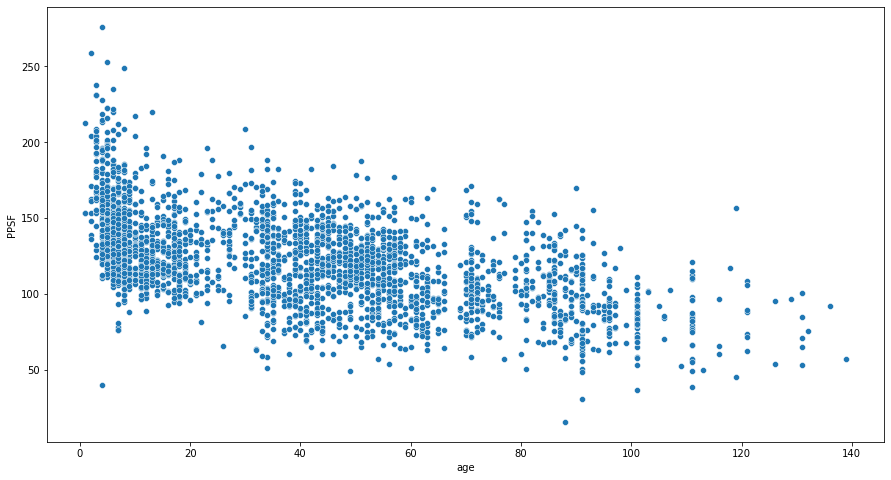

In [157]:
sns.scatterplot(data = data, x = 'age', y = 'PPSF')

<AxesSubplot:xlabel='YearBuilt', ylabel='PPSF'>

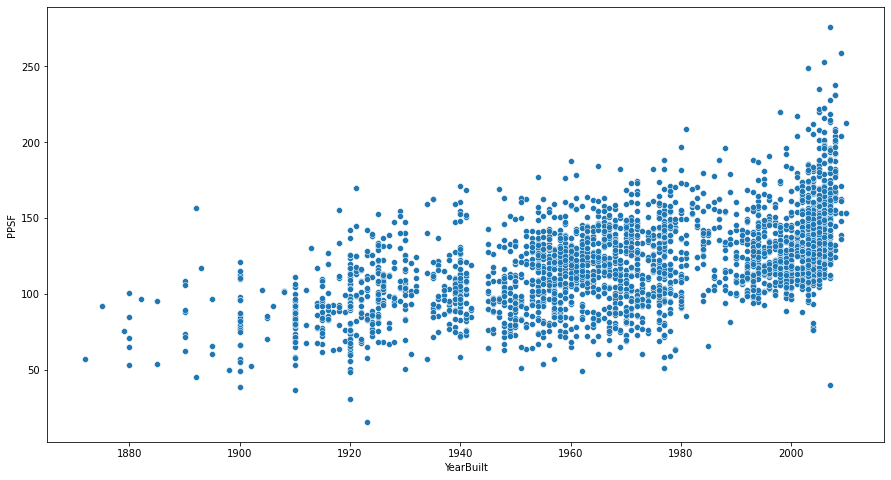

In [163]:
sns.scatterplot( x = data['YearBuilt'], y = data['PPSF'])

In [175]:
 df = data[ordinals]

In [178]:
selected_rows = df[~df.isnull().any(axis=1)]
data.loc[selected_rows.index,'SalePrice']

0       126000
1       139500
2       139500
3       124900
4       114000
         ...  
2618    196500
2619    121000
2621    145000
2622    217500
2623    215000
Name: SalePrice, Length: 2434, dtype: int64

In [171]:
selected_rows.isna().sum()

BsmtQual       0
BsmtCond       0
ExterQual      0
ExterCond      0
KitchenQual    0
GarageQual     0
GarageCond     0
HeatingQC      0
dtype: int64

In [181]:
from sklearn.feature_selection import f_regression
F_values, p_values = f_regression(selected_rows,data.loc[selected_rows.index,'SalePrice'])

pd.Series(p_values, index=selected_rows.columns).sort_values()

ExterQual       0.000000e+00
BsmtQual       4.155733e-296
KitchenQual    1.844186e-294
HeatingQC      5.067239e-109
GarageQual      3.485606e-23
GarageCond      5.332291e-12
BsmtCond        4.304047e-11
ExterCond       5.214377e-01
dtype: float64

In [183]:
len(data.columns)

89

In [276]:
predicting = ['SalePrice','PPSF']
unimportant = ['PID']

not_sure = ['Functional','HouseStyle', 'LotShape','MSSubClass','MSZoning','SaleCondition']

ordinal = ['BsmtCond','BsmtExposure','BsmtQual','ExterCond',
           'ExterQual','FireplaceQu','GarageCond','GarageQual','HeatingQC',
           'KitchenQual','LandSlope','PoolQC']

nominal = ['Alley','BldgType','BsmtFinType1', 'BsmtFinType2',
           'CentralAir','Condition1','Condition2','Electrical',
           'Exterior1st','Exterior2nd','Fence','Foundation',
           'GarageFinish','GarageType','Heating','LandContour','LotConfig',
           'MasVnrType','MiscFeature','Neighborhood','PavedDrive','Prop_Addr',
           'RoofMatl','RoofStyle','SaleType','Street','Utilities']

continuous = ['1stFlrSF','2ndFlrSF', '3SsnPorch','BsmtFinSF1',
              'BsmtFinSF2','BsmtUnfSF','EnclosedPorch','GarageArea','GrLivArea',
              'LotArea','LotFrontage','LowQualFinSF','MasVnrArea','MiscVal',
              'OpenPorchSF','PoolArea','ScreenPorch','TotalBsmtSF','WoodDeckSF','distFromCollege']

discrete = ['BedroomAbvGr','BsmtFullBath','BsmtFullBath','Fireplaces',
            'FullBath','GarageYrBlt','HalfBath','KitchenAbvGr','MoSold',
            'OverallCond','OverallQual','TotRmsAbvGrd','YearBuilt','YearRemodAdd','YrSold','date']
data.columns.sort_values()

Index(['1stFlrSF', '2ndFlrSF', '3SsnPorch', 'Alley', 'BedroomAbvGr',
       'BldgType', 'BsmtCond', 'BsmtExposure', 'BsmtFinSF1', 'BsmtFinSF2',
       'BsmtFinType1', 'BsmtFinType2', 'BsmtFullBath', 'BsmtHalfBath',
       'BsmtQual', 'BsmtUnfSF', 'CentralAir', 'Condition1', 'Condition2',
       'Electrical', 'EnclosedPorch', 'ExterCond', 'ExterQual', 'Exterior1st',
       'Exterior2nd', 'Fence', 'FireplaceQu', 'Fireplaces', 'Foundation',
       'FullBath', 'Functional', 'GarageArea', 'GarageCars', 'GarageCond',
       'GarageFinish', 'GarageQual', 'GarageType', 'GarageYrBlt', 'GrLivArea',
       'HalfBath', 'Heating', 'HeatingQC', 'HouseStyle', 'KitchenAbvGr',
       'KitchenQual', 'LandContour', 'LandSlope', 'LotArea', 'LotConfig',
       'LotFrontage', 'LotShape', 'LowQualFinSF', 'MSSubClass', 'MSZoning',
       'MasVnrArea', 'MasVnrType', 'MiscFeature', 'MiscVal', 'MoSold',
       'Neighborhood', 'OpenPorchSF', 'OverallCond', 'OverallQual', 'PID',
       'PPSF', 'PavedDrive', 'PoolA

In [250]:
from sklearn.feature_selection import f_regression
F_values, p_values = f_regression(data[continuous],data['SalePrice'])

pd.Series(p_values, index=data[continuous].columns).sort_values()

TotalBsmtSF         0.000000e+00
GrLivArea           0.000000e+00
1stFlrSF           1.889620e-311
GarageArea         6.990878e-292
MasVnrArea         3.367999e-162
BsmtFinSF1         3.899532e-141
LotFrontage         1.226083e-68
WoodDeckSF          7.050871e-66
OpenPorchSF         2.423487e-57
LotArea             3.449632e-47
2ndFlrSF            1.070147e-41
distFromCollege     4.423496e-22
BsmtUnfSF           1.002693e-18
ScreenPorch         5.254042e-11
EnclosedPorch       3.316463e-10
BsmtFinSF2          8.654599e-02
LowQualFinSF        9.735633e-02
3SsnPorch           1.131983e-01
PoolArea            1.193165e-01
MiscVal             3.490953e-01
dtype: float64

In [ ]:
#Should we drop any columns tha have a pvalue above .05?
# BsmtFinSF2          8.654599e-02
# LowQualFinSF        9.735633e-02
# 3SsnPorch           1.131983e-01
# PoolArea            1.193165e-01
# MiscVal             3.490953e-01


In [305]:
for c in data[discrete].columns:
    print(c,data[data[c] == 'None'].size)

BedroomAbvGr 0
BsmtFullBath 0
BsmtFullBath 0
Fireplaces 0
FullBath 0
GarageYrBlt 11790
HalfBath 0
KitchenAbvGr 0
OverallCond 0
OverallQual 0
TotRmsAbvGrd 0
YearBuilt 0
YearRemodAdd 0
date 0


In [324]:
data.loc[0,'GarageYrBlt']

'1939.0'

In [262]:
 data['hasPool'] = data.PoolArea.apply(lambda r : 1 if r > 0 else 0)

<AxesSubplot:xlabel='hasPool', ylabel='SalePrice'>

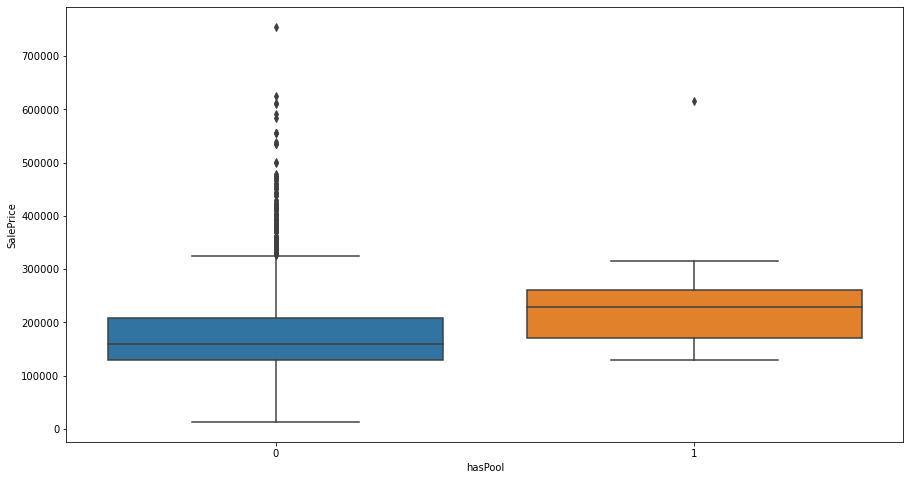

In [264]:
sns.boxplot(data = data, x = 'hasPool', y = 'SalePrice')

In [342]:
data.filter(regex = 'Garage')

,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond
0,Detchd,1939.0,Unf,2.0,399.0,TA,TA
1,Attchd,1984.0,Fin,1.0,266.0,TA,TA
2,Attchd,1984.0,Fin,1.0,266.0,TA,TA
3,Detchd,1930.0,Unf,1.0,216.0,TA,Po
4,Detchd,1940.0,Unf,1.0,281.0,TA,TA
5,Attchd,2001.0,Fin,2.0,528.0,TA,TA
6,BuiltIn,2003.0,RFn,2.0,672.0,TA,TA
7,Detchd,1974.0,Unf,2.0,576.0,TA,TA
8,Attchd,2007.0,Fin,2.0,428.0,TA,TA
9,Attchd,1984.0,Unf,2.0,484.0,TA,TA


In [36]:
import plotly.express as px
px.set_mapbox_access_token("pk.eyJ1IjoidG9ueXBhcmswMDEiLCJhIjoiY2t2dWVramFmODZqaDJucXBrbnhpZ2JreCJ9.-XXf1YI8YESgWbWODhZAZA")

In [37]:
!pip install kaleido

     |████████████████████████████████| 85.2 MB 16.0 MB/s eta 0:00:01


In [55]:
fig = px.density_mapbox(data,
                        radius = 6,
                        opacity= 1,
                        lat = "lat",
                        lon = "long",
                        z = "SalePrice",
                        center = {'lat':42.02591 ,'lon' :93.6699},
                        range_color= [50000,700000],
#                         lat="lat",
#                         lon="long"
#                         color = "Neighborhood",
#                         size_max=15,
                         zoom=11
                          )
fig.show()
# fig.write_image("your_image.pdf", engine="kaleido")

SyntaxError: invalid syntax (<ipython-input-37-6013a1312acf>, line 3)